##Problem Statement:
The objective of this project is to gain insights and understand the factors influencing the price of used cars. By performing exploratory data analysis (EDA) and conducting statistical and probabilistic analysis on a dataset of historically used car sales data


##Importing the dependencies and data

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#'latin-1'

In [69]:
df=pd.read_csv('https://query.data.world/s/qbrnnrb63qazicnm62bd5rueuqmqga?dws=00000',encoding='ISO-8859-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [70]:
print('The number of rows: ', df.shape[0])
print("The number of columns: ",df.shape[1])

The number of rows:  371528
The number of columns:  20


In [71]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [72]:
df.describe(include='object')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


In [73]:
#Null values present in the data
(df.isnull().sum()/len(df))*100

dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.192771
yearOfRegistration      0.000000
gearbox                 5.439429
powerPS                 0.000000
model                   5.513447
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.986133
brand                   0.000000
notRepairedDamage      19.395577
dateCreated             0.000000
nrOfPictures            0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64

###Null values are present in vehicle type,gearbox,model,fueltype,not repaired damage columns

In [74]:
#Checking the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [75]:
df.head(1)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57


In [76]:
#converting the date columns to datetime object
cols=['dateCrawled','dateCreated','lastSeen']
def convert(df,columns):
  for col in columns:
    df[col]=pd.to_datetime(df[col],errors='coerce')
  return df

convert(df,cols)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          333659 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

In [78]:
df['name'].value_counts()

Ford_Fiesta                                              657
BMW_318i                                                 627
Opel_Corsa                                               622
Volkswagen_Golf_1.4                                      603
BMW_316i                                                 523
                                                        ... 
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON      1
Renault_clio_in_gold_450VB_!!                              1
Fiat_Doblo_1.6_Multijet                                    1
Renault_Laguna_1                                           1
BMW_M135i_vollausgestattet_NP_52.720____Euro               1
Name: name, Length: 233531, dtype: int64

In [79]:
df['name'].unique()

array(['Golf_3_1.6', 'A5_Sportback_2.7_Tdi',
       'Jeep_Grand_Cherokee_"Overland"', ...,
       'Smart_smart_leistungssteigerung_100ps', 'VW_Golf_Kombi_1_9l_TDI',
       'BMW_M135i_vollausgestattet_NP_52.720____Euro'], dtype=object)

In [80]:
df['name']

0                                           Golf_3_1.6
1                                 A5_Sportback_2.7_Tdi
2                       Jeep_Grand_Cherokee_"Overland"
3                                   GOLF_4_1_4__3TÜRER
4                       Skoda_Fabia_1.4_TDI_PD_Classic
                              ...                     
371523                      Suche_t4___vito_ab_6_sitze
371524           Smart_smart_leistungssteigerung_100ps
371525              Volkswagen_Multivan_T4_TDI_7DC_UY2
371526                          VW_Golf_Kombi_1_9l_TDI
371527    BMW_M135i_vollausgestattet_NP_52.720____Euro
Name: name, Length: 371528, dtype: object

In [81]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [82]:
#df.shape   #\n ','

In [83]:
df[df['name'].apply(lambda x: True if '\n' in x else False)]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
112845,2016-03-15 08:54:49,Sehr_Schoener_VW_Lupo_1_4_Sport__Bildschoene_O...,privat,Angebot,19900,control,suv,2010,automatik,177,x_reihe,125000,1,diesel,bmw,nein,2016-03-15,0,86441,2016-03-17 06:47:09
142235,2016-03-27 22:51:54,"""SUCHE_OPEL_VECTRA_B.""SUCHE"",privat,Angebot,0,...",privat,Angebot,4000,test,kombi,2006,manuell,102,octavia,150000,10,benzin,skoda,NaN,2016-03-09,0,22159,2016-03-15 03:44:16


In [84]:
df[df['name'].apply(lambda x: True if ',' in x else False)]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
112845,2016-03-15 08:54:49,Sehr_Schoener_VW_Lupo_1_4_Sport__Bildschoene_O...,privat,Angebot,19900,control,suv,2010,automatik,177,x_reihe,125000,1,diesel,bmw,nein,2016-03-15,0,86441,2016-03-17 06:47:09
142235,2016-03-27 22:51:54,"""SUCHE_OPEL_VECTRA_B.""SUCHE"",privat,Angebot,0,...",privat,Angebot,4000,test,kombi,2006,manuell,102,octavia,150000,10,benzin,skoda,NaN,2016-03-09,0,22159,2016-03-15 03:44:16


In [85]:
df.sample()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
110693,2016-03-22 19:57:55,Volkswagen_Golf_II___wird_dieses_Jahr_25__,privat,Angebot,500,test,coupe,1991,manuell,55,golf,150000,7,benzin,volkswagen,NaN,2016-03-22,0,34590,2016-03-25 12:18:09


##Data Understanding


In [86]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46


In [87]:
df['model'].value_counts()

golf               30070
andere             26400
3er                20567
polo               13092
corsa              12573
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [88]:
df['brand'].value_counts()[:10]

volkswagen       79640
bmw              40274
opel             40136
mercedes_benz    35309
audi             32873
ford             25573
renault          17969
peugeot          11027
fiat              9676
seat              7022
Name: brand, dtype: int64

Text(0.5, 1.0, 'Top 10 Car brands')

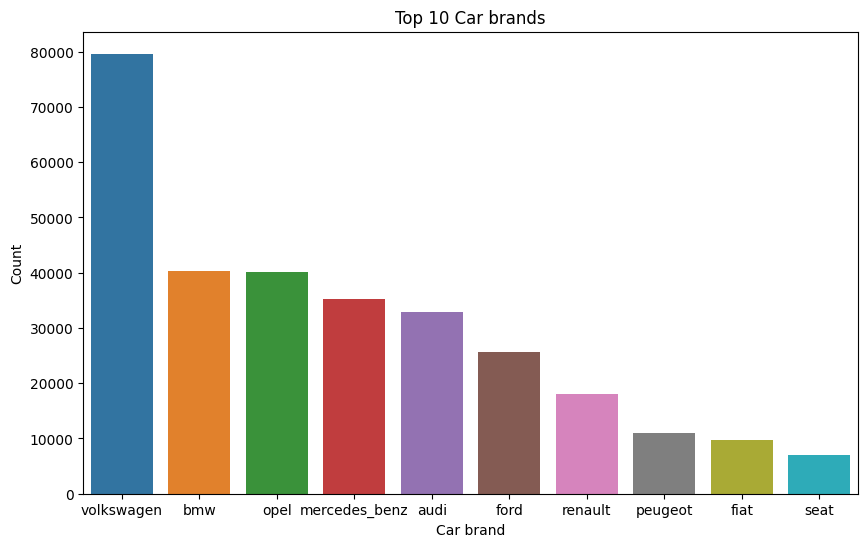

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['brand'].value_counts()[:10].index,y=df['brand'].value_counts()[:10].values)
plt.xlabel('Car brand')
plt.ylabel('Count')
plt.title('Top 10 Car brands')

Text(0.5, 1.0, 'Top 10 Car Models')

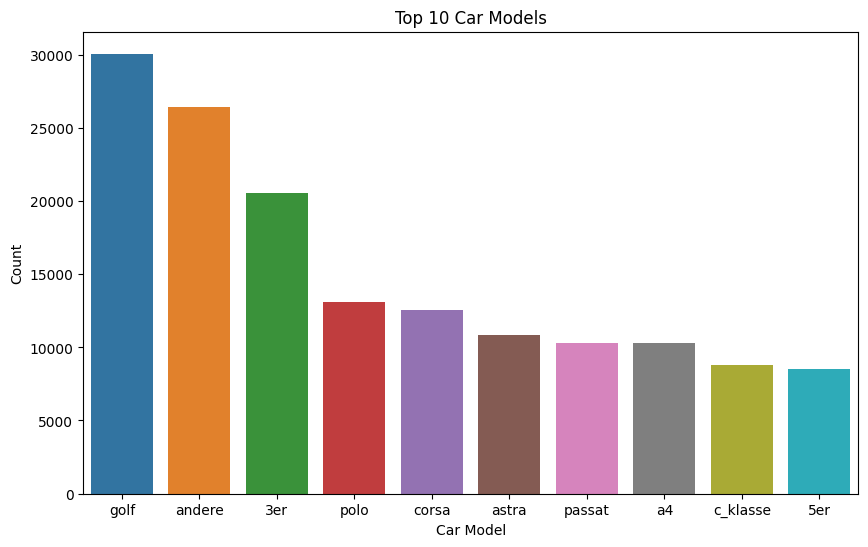

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['model'].value_counts()[:10].index,y=df['model'].value_counts()[:10].values)
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.title('Top 10 Car Models')

In [91]:
df['model'].isnull().sum()

20484

In [92]:
df['model'].nunique()

251

In [93]:
df['yearOfRegistration'].nunique()

155

In [94]:
df['yearOfRegistration'].value_counts()

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
        ...  
2066        1
9450        1
3200        1
1925        1
3500        1
Name: yearOfRegistration, Length: 155, dtype: int64

In [95]:
df['yearOfRegistration'].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

###There are lot of outliers present in year of registration column

In [96]:
df['fuelType'].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [97]:
df['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [98]:
df['price'].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [99]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

##Determine the time period covered by the dataset

In [100]:
year=df['dateCrawled'].dt.year
year.describe()

count    371528.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: dateCrawled, dtype: float64

In [101]:
year2=df['dateCreated'].dt.year
year2.describe()

count    371528.000000
mean       2015.999917
std           0.009424
min        2014.000000
25%        2016.000000
50%        2016.000000
75%        2016.000000
max        2016.000000
Name: dateCreated, dtype: float64

In [102]:
year3=df['lastSeen'].dt.year
year3.describe()

count    371528.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: lastSeen, dtype: float64

In [103]:
df['yearOfRegistration'].quantile(.001)

1954.0

In [104]:
df['yearOfRegistration'].quantile(.999)

2018.0

In [105]:
#

All the adds crawled in 2016 same year

The year of registeration of cars are from 1954 to 2018 ,outliers are ignored

##Data Preprocessing

Handling missing values

In [106]:
df.isnull().sum()/len(df)

dateCrawled            0.000000
name                   0.000000
seller                 0.000000
offerType              0.000000
price                  0.000000
abtest                 0.000000
vehicleType            0.101928
yearOfRegistration     0.000000
gearbox                0.054394
powerPS                0.000000
model                  0.055134
kilometer              0.000000
monthOfRegistration    0.000000
fuelType               0.089861
brand                  0.000000
notRepairedDamage      0.193956
dateCreated            0.000000
nrOfPictures           0.000000
postalCode             0.000000
lastSeen               0.000000
dtype: float64

In [107]:
df[df.columns[df.isnull().any()]].head(3)

,vehicleType,gearbox,model,fuelType,notRepairedDamage
0,NaN,manuell,golf,benzin,NaN
1,coupe,manuell,NaN,diesel,ja
2,suv,automatik,grand,diesel,NaN




since there are very less missing values in gearbox, model and fueltype
Filling it with mode

In [108]:
df2=df.copy()


In [109]:
df['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [110]:
df['notRepairedDamage'].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [111]:
df2['gearbox'].fillna(df2['gearbox'].mode()[0],inplace=True)
df2['model'].fillna(df2['model'].mode()[0],inplace=True)
df2['fuelType'].fillna(df2['model'].mode()[0],inplace=True)
df2['vehicleType'].fillna(df2['vehicleType'].mode()[0],inplace=True)
df2['notRepairedDamage'].fillna(df2['notRepairedDamage'].mode()[0],inplace=True)

In [112]:
df2.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [113]:
df2['nrOfPictures'].dtype

dtype('int64')

In [114]:
df2.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [115]:
df['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

###handling Outliers

<Axes: >

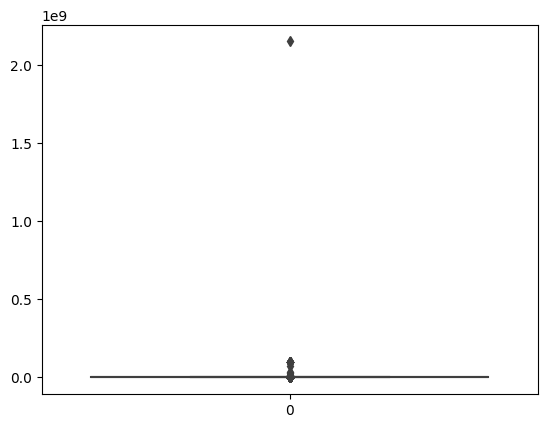

In [116]:
sns.boxplot(df2['price'])

In [117]:
df2['price'].quantile(0.001)

0.0

In [118]:
df2['price'].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [119]:
np.percentile(df2['price'],np.linspace(0,100,11))

array([0.00000000e+00, 5.00000000e+02, 9.00000000e+02, 1.40000000e+03,
       2.00000000e+03, 2.95000000e+03, 4.15000000e+03, 5.99900000e+03,
       8.80000000e+03, 1.40000000e+04, 2.14748365e+09])

In [120]:
df2[df2['price']<500]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25 16:47:58
15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450_VB,privat,Angebot,450,test,kleinwagen,1910,manuell,0,ka,5000,0,benzin,ford,nein,2016-03-11,0,24148,2016-03-19 08:46:47
16,2016-04-01 12:46:46,Polo_6n_1_4,privat,Angebot,300,test,limousine,2016,manuell,60,polo,150000,0,benzin,volkswagen,nein,2016-04-01,0,38871,2016-04-01 12:46:46
23,2016-03-12 19:43:07,Stadtflitzer,privat,Angebot,450,test,kleinwagen,1997,manuell,50,arosa,150000,5,benzin,seat,nein,2016-03-12,0,9526,2016-03-21 01:46:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371473,2016-03-15 19:57:11,Subaru_Allrad,privat,Angebot,400,control,kombi,1991,manuell,0,legacy,150000,0,benzin,subaru,nein,2016-03-15,0,24558,2016-03-19 15:49:00
371486,2016-03-30 20:55:30,Zu_verkaufen,privat,Angebot,350,control,kleinwagen,1996,manuell,65,punto,150000,0,golf,fiat,nein,2016-03-30,0,25436,2016-04-07 13:50:41
371492,2016-04-04 14:41:28,Opel_Corsa_B_Swing_grau,privat,Angebot,390,test,kleinwagen,1997,automatik,0,corsa,100000,6,benzin,opel,ja,2016-04-04,0,17509,2016-04-06 15:46:11
371495,2016-03-31 19:52:33,Opel_Tigra,privat,Angebot,180,control,limousine,1995,manuell,0,golf,125000,3,benzin,opel,nein,2016-03-31,0,41470,2016-04-06 14:18:04


In [121]:
df2['price'].quantile(.1)

500.0

In [122]:
df2[df2['price']<30]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25 16:47:58
40,2016-03-26 22:06:17,Suche_Opel_corsa_a_zu_verschenken,privat,Angebot,0,test,limousine,1990,manuell,0,corsa,150000,1,benzin,opel,nein,2016-03-26,0,56412,2016-03-27 17:43:34
60,2016-03-29 15:48:15,TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...,privat,Angebot,1,control,suv,1994,manuell,286,golf,150000,11,golf,sonstige_autos,nein,2016-03-29,0,53721,2016-04-06 01:44:38
91,2016-03-28 09:37:01,MERCEDES_BENZ_W124_250D_83KW_/_113PS___SCHLACH...,privat,Angebot,1,control,limousine,1995,manuell,113,e_klasse,150000,4,diesel,mercedes_benz,nein,2016-03-28,0,40589,2016-04-06 12:15:54
115,2016-03-19 18:40:12,Golf_IV_1.4_16V,privat,Angebot,0,test,limousine,2017,manuell,0,golf,5000,12,benzin,volkswagen,nein,2016-03-19,0,21698,2016-04-01 08:47:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371356,2016-03-09 15:56:30,Verkaufen_einen_Opel_corsa_b_worlcup_cool,privat,Angebot,0,control,limousine,2000,manuell,65,corsa,150000,0,golf,opel,ja,2016-03-09,0,23758,2016-03-30 11:16:08
371392,2016-03-20 14:55:07,Ford_Fiesta_1.3___60PS___Bj_2002___Klima___Servo,privat,Angebot,0,test,kleinwagen,2002,manuell,60,fiesta,150000,3,benzin,ford,nein,2016-03-20,0,33659,2016-04-06 18:45:23
371402,2016-03-24 13:48:05,Suzuki_Swift_zu_verkaufen,privat,Angebot,0,control,kleinwagen,1999,manuell,53,swift,150000,3,benzin,suzuki,nein,2016-03-24,0,42329,2016-04-07 05:17:24
371431,2016-03-10 22:55:50,Seat_Arosa,privat,Angebot,0,control,kleinwagen,1999,manuell,37,arosa,150000,7,benzin,seat,ja,2016-03-10,0,22559,2016-03-12 23:46:32


In [123]:
df2[df2['price']==0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25 16:47:58
40,2016-03-26 22:06:17,Suche_Opel_corsa_a_zu_verschenken,privat,Angebot,0,test,limousine,1990,manuell,0,corsa,150000,1,benzin,opel,nein,2016-03-26,0,56412,2016-03-27 17:43:34
115,2016-03-19 18:40:12,Golf_IV_1.4_16V,privat,Angebot,0,test,limousine,2017,manuell,0,golf,5000,12,benzin,volkswagen,nein,2016-03-19,0,21698,2016-04-01 08:47:05
119,2016-03-20 18:53:27,Polo_6n_Karosse_zu_verschenken,privat,Angebot,0,test,kleinwagen,1999,manuell,0,golf,5000,0,benzin,volkswagen,nein,2016-03-20,0,37520,2016-04-07 02:45:22
157,2016-03-11 18:55:53,Opel_meriva_1.6_16_v_lpg__z16xe_no_OPC,privat,Angebot,0,test,bus,2004,manuell,101,meriva,150000,10,lpg,opel,ja,2016-03-11,0,27432,2016-03-12 23:47:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371356,2016-03-09 15:56:30,Verkaufen_einen_Opel_corsa_b_worlcup_cool,privat,Angebot,0,control,limousine,2000,manuell,65,corsa,150000,0,golf,opel,ja,2016-03-09,0,23758,2016-03-30 11:16:08
371392,2016-03-20 14:55:07,Ford_Fiesta_1.3___60PS___Bj_2002___Klima___Servo,privat,Angebot,0,test,kleinwagen,2002,manuell,60,fiesta,150000,3,benzin,ford,nein,2016-03-20,0,33659,2016-04-06 18:45:23
371402,2016-03-24 13:48:05,Suzuki_Swift_zu_verkaufen,privat,Angebot,0,control,kleinwagen,1999,manuell,53,swift,150000,3,benzin,suzuki,nein,2016-03-24,0,42329,2016-04-07 05:17:24
371431,2016-03-10 22:55:50,Seat_Arosa,privat,Angebot,0,control,kleinwagen,1999,manuell,37,arosa,150000,7,benzin,seat,ja,2016-03-10,0,22559,2016-03-12 23:46:32


There are 10 thousand rows where price is 0

In [124]:
np.percentile(df2['price'],np.linspace(0.5,10,11)) # considering the 50 as min price and equating 0 price to 50

array([  0.,   0.,   0.,  50., 150., 220., 299., 350., 400., 450., 500.])

In [125]:
#replacing the 0 with 50
df2['price']=df2['price'].replace(0,50)
df2[df2['price']==0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [126]:
np.percentile(df2['price'],np.linspace(90,100,11))

array([1.40000000e+04, 1.49500000e+04, 1.59000000e+04, 1.69000000e+04,
       1.79990000e+04, 1.97900000e+04, 2.19000000e+04, 2.45000000e+04,
       2.80000000e+04, 3.60000000e+04, 2.14748365e+09])

In [127]:
np.percentile(df2['price'],np.linspace(99.7,100,11))

array([5.98500000e+04, 6.25000000e+04, 6.59000000e+04, 6.99000000e+04,
       7.49990000e+04, 8.35000000e+04, 9.80000000e+04, 1.16000000e+05,
       1.59999084e+05, 3.80838000e+05, 2.14748365e+09])

<Axes: >

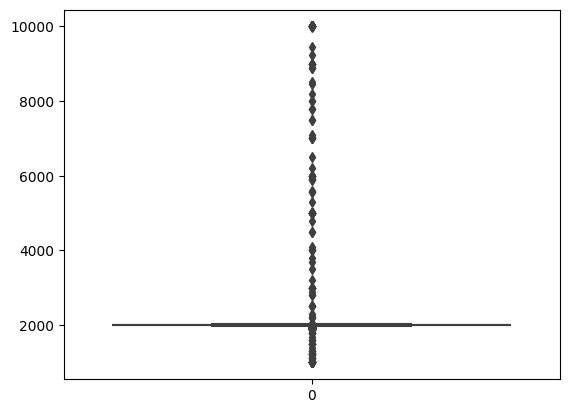

In [128]:
sns.boxplot(df2['yearOfRegistration'])

In [129]:
df2['yearOfRegistration'].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [130]:
df2[(df2['yearOfRegistration']>2019) ]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
13576,2016-03-29 18:39:40,Verkaufe_DESIGN_Streifen_/_Aufkleber_VW__Opel_...,privat,Angebot,49,control,limousine,5000,manuell,0,golf,5000,12,golf,volkswagen,nein,2016-03-29,0,74523,2016-04-06 04:16:14
15894,2016-03-14 00:52:02,Alles_anbieten,privat,Angebot,50,control,limousine,9999,manuell,0,golf,10000,0,golf,sonstige_autos,nein,2016-03-13,0,32689,2016-03-21 23:46:46
16657,2016-04-02 11:55:48,quad_neu_t?v_tauschen_gegen_Auto,privat,Angebot,1700,test,limousine,3200,manuell,0,golf,5000,0,golf,sonstige_autos,nein,2016-04-02,0,33649,2016-04-06 09:46:13
18121,2016-03-23 16:43:29,Opel_GT_Karosserie_mit_Brief!,privat,Angebot,700,test,limousine,9999,manuell,0,andere,10000,0,golf,opel,nein,2016-03-23,0,21769,2016-04-05 20:16:15
18196,2016-03-06 16:06:20,Reo_Vorkriegs_Oldtimer_Rennwagen_1928,privat,Angebot,6500,control,limousine,8888,manuell,0,golf,10000,0,golf,sonstige_autos,nein,2016-03-06,0,55262,2016-03-30 20:46:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351235,2016-03-20 17:53:51,Vw_Golf_1_16v_Turbo,privat,Angebot,12000,test,limousine,4000,manuell,500,golf,5000,0,golf,volkswagen,nein,2016-03-20,0,57392,2016-04-07 00:46:30
352029,2016-03-09 07:01:27,Mini_MK2_Top_ohne_Rost_sucht_neuen_Liebhaber,privat,Angebot,50,control,limousine,7500,manuell,0,andere,10000,0,benzin,mini,nein,2016-03-09,0,9669,2016-03-19 19:44:50
355280,2016-03-24 19:49:36,Golf_4_Karosse_schrott_Kupfer,privat,Angebot,50,control,limousine,3000,manuell,3000,golf,100000,6,golf,volkswagen,ja,2016-03-24,0,23992,2016-04-03 13:17:57
357075,2016-04-02 17:44:03,Tausche_hier_mein_Quad,privat,Angebot,50,control,limousine,3500,manuell,75,golf,5000,3,benzin,sonstige_autos,nein,2016-04-02,0,96465,2016-04-04 15:17:51


In [131]:
df2[df2['yearOfRegistration']<1954]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450_VB,privat,Angebot,450,test,kleinwagen,1910,manuell,0,ka,5000,0,benzin,ford,nein,2016-03-11,0,24148,2016-03-19 08:46:47
649,2016-03-16 16:55:09,195/55_r15_sommerreifen_alu,privat,Angebot,50,control,limousine,1111,manuell,0,golf,5000,0,golf,opel,nein,2016-03-16,0,44628,2016-03-20 16:44:37
2018,2016-03-25 15:58:21,Volkswagen_Andere_typ82,privat,Angebot,7000,test,suv,1945,manuell,48,andere,150000,2,benzin,volkswagen,nein,2016-03-25,0,58135,2016-03-25 15:58:21
2376,2016-03-15 21:44:32,Andere_Andere,privat,Angebot,1800,control,cabrio,1925,manuell,0,golf,5000,1,golf,sonstige_autos,nein,2016-03-15,0,79288,2016-04-07 05:15:34
6945,2016-04-02 13:47:16,Bellier_Vario,privat,Angebot,50,test,kleinwagen,1910,manuell,0,golf,5000,1,andere,sonstige_autos,nein,2016-04-02,0,93105,2016-04-04 11:16:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365751,2016-03-22 00:38:15,Kostenlose_altautoentsorgung,privat,Angebot,1,control,limousine,1000,manuell,1000,golf,150000,0,golf,sonstige_autos,nein,2016-03-21,0,41472,2016-04-05 14:18:01
365856,2016-04-01 21:53:29,Chevrolet_3600_Pickup__Oldtimer__6_Zyl__5_Fens...,privat,Angebot,11000,test,suv,1950,manuell,0,andere,5000,6,benzin,chevrolet,nein,2016-04-01,0,79098,2016-04-05 20:18:28
368731,2016-03-12 00:57:39,Fiat_500c_Belvedere__Topolino__Oldtimer,privat,Angebot,11500,test,limousine,1800,manuell,16,andere,5000,6,benzin,fiat,nein,2016-03-11,0,16515,2016-04-05 19:47:27
370654,2016-03-16 21:56:55,Mercedes_Benz_170V___Vorkriegsmodell,privat,Angebot,6000,control,limousine,1937,manuell,38,andere,5000,0,benzin,mercedes_benz,nein,2016-03-16,0,23936,2016-03-30 18:47:41


Dropping rows year of registration which has less than 1954 and more than 2019

In [132]:
np.percentile(df2['yearOfRegistration'],np.linspace(99.9,100,11))

array([2018.    , 2018.    , 2018.    , 2018.    , 2018.    , 2018.    ,
       2018.    , 2211.9218, 5000.    , 8493.1285, 9999.    ])

In [133]:
np.percentile(df2['yearOfRegistration'],np.linspace(.1,5,11))

array([1954., 1971., 1979., 1984., 1987., 1989., 1990., 1990., 1991.,
       1992., 1992.])

In [134]:
#df3=df3[(df3['yearOfRegistration']>=1954) & (df3['yearOfRegistration']<=2019)]
#df3.shape

In [135]:
df3=df2[(df2['price']<=3.80838000e+05) & (df2['price']>=30)] #considering the values less than 3.80838000e+05
df3.head() #dropping 1000 rowa which are more than above 3.8 e4 values

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [136]:
df2['powerPS'].describe()

count    371528.000000
mean        115.549477
std         192.139578
min           0.000000
25%          70.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

In [137]:
#checking for power
np.percentile(df2['powerPS'],np.linspace(99.7,100,11))

array([  457.    ,   480.8771,   500.    ,   507.    ,   525.    ,
         560.    ,   604.    ,   900.    ,  1400.    ,  2018.    ,
       20000.    ])

In [138]:
np.percentile(df2['powerPS'],np.linspace(5,15,11))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  3., 45., 50., 53., 54.])

In [139]:
df2[df2['powerPS']==0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57
15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450_VB,privat,Angebot,450,test,kleinwagen,1910,manuell,0,ka,5000,0,benzin,ford,nein,2016-03-11,0,24148,2016-03-19 08:46:47
32,2016-03-15 20:59:01,Golf_3_....._1.4,privat,Angebot,245,test,limousine,1994,manuell,0,golf,150000,2,benzin,volkswagen,nein,2016-03-15,0,44145,2016-03-17 18:17:43
37,2016-03-28 17:50:15,Renault_Kangoo_1.9_Diesel,privat,Angebot,1500,test,limousine,2016,manuell,0,kangoo,150000,1,diesel,renault,nein,2016-03-28,0,46483,2016-03-30 09:18:02
40,2016-03-26 22:06:17,Suche_Opel_corsa_a_zu_verschenken,privat,Angebot,50,test,limousine,1990,manuell,0,corsa,150000,1,benzin,opel,nein,2016-03-26,0,56412,2016-03-27 17:43:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371495,2016-03-31 19:52:33,Opel_Tigra,privat,Angebot,180,control,limousine,1995,manuell,0,golf,125000,3,benzin,opel,nein,2016-03-31,0,41470,2016-04-06 14:18:04
371504,2016-03-07 17:06:35,220_cdi_Benz,privat,Angebot,2600,control,limousine,2005,automatik,0,c_klasse,150000,9,golf,mercedes_benz,nein,2016-03-07,0,61169,2016-03-08 21:28:38
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27,0,26624,2016-03-29 10:17:23
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,50,control,limousine,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21,0,2694,2016-03-21 10:42:49


40 k rows has zero power

In [140]:
df3=df3[(df3['yearOfRegistration']>=1954) & (df3['yearOfRegistration']<=2019)]
df3.shape

(369481, 20)

In [141]:
df3.shape

(369481, 20)

In [142]:
df3['yearOfRegistration'].describe()

count    369481.000000
mean       2003.419884
std           7.474067
min        1954.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2019.000000
Name: yearOfRegistration, dtype: float64

In [143]:
df3=df3[(df3['yearOfRegistration']>=1954) & (df3['yearOfRegistration']<=2019)]
df3.shape

(369481, 20)

<ipython-input-144-60e9d36e3612>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price'])


<Axes: xlabel='price', ylabel='Density'>

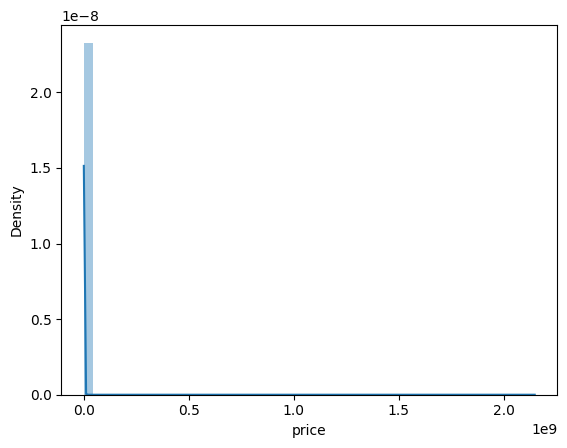

In [144]:
sns.distplot(df2['price'])

##Statistical anlaysis

In [145]:
df3.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


###Calculate summary statistics (mean, median, standard deviation) for key variables to understand their central tendencies and variabilities.


In [146]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369481 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          369481 non-null  datetime64[ns]
 1   name                 369481 non-null  object        
 2   seller               369481 non-null  object        
 3   offerType            369481 non-null  object        
 4   price                369481 non-null  int64         
 5   abtest               369481 non-null  object        
 6   vehicleType          369481 non-null  object        
 7   yearOfRegistration   369481 non-null  int64         
 8   gearbox              369481 non-null  object        
 9   powerPS              369481 non-null  int64         
 10  model                369481 non-null  object        
 11  kilometer            369481 non-null  int64         
 12  monthOfRegistration  369481 non-null  int64         
 13  fuelType      

In [147]:
df3.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,369481.00000,369481.000000,369481.000000,369481.000000,369481.000000,369481.0,369481.000000
mean,5748.05478,2003.419884,115.727320,125806.793854,5.749930,0.0,50835.529819
std,8816.72892,7.474067,191.402999,39844.400517,3.706598,0.0,25796.667207
min,30.00000,1954.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1180.00000,1999.000000,70.000000,125000.000000,3.000000,0.0,30519.000000
50%,2990.00000,2003.000000,105.000000,150000.000000,6.000000,0.0,49624.000000
75%,7200.00000,2008.000000,150.000000,150000.000000,9.000000,0.0,71563.000000
max,370000.00000,2019.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


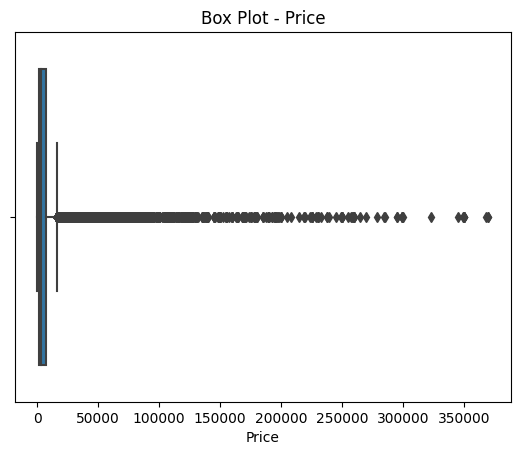

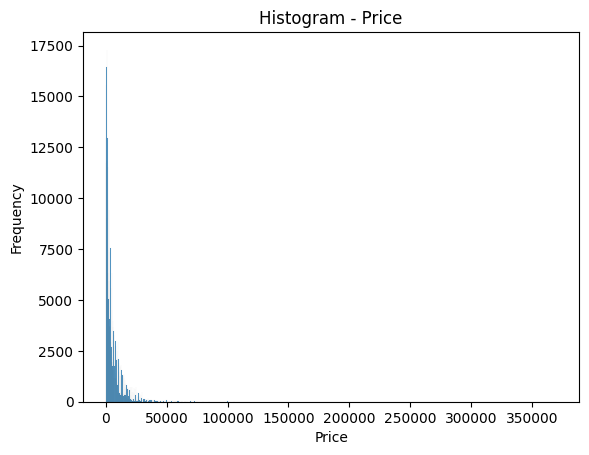

In [148]:
sns.boxplot(x=df3["price"])
plt.title("Box Plot - Price")
plt.xlabel("Price")
plt.show()

sns.histplot(df3["price"])
plt.title("Histogram - Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

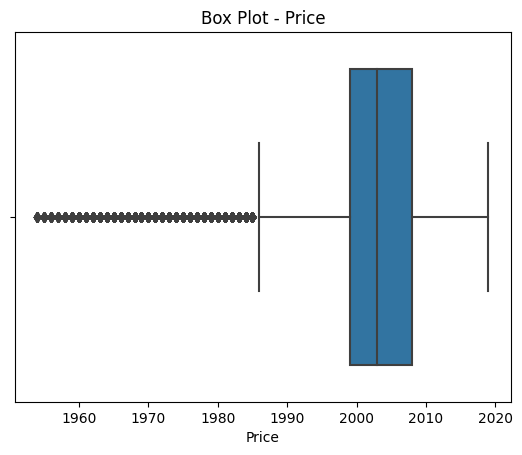

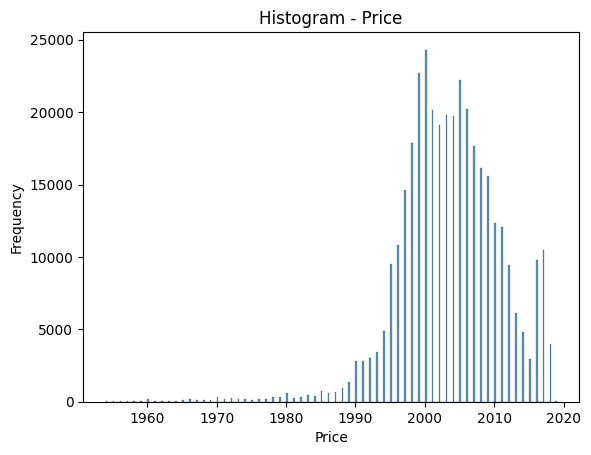

In [149]:
sns.boxplot(x=df3["yearOfRegistration"])
plt.title("Box Plot - Price")
plt.xlabel("Price")
plt.show()

sns.histplot(df3["yearOfRegistration"])
plt.title("Histogram - Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

##Histogram and box plots for price

In [150]:
df3.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

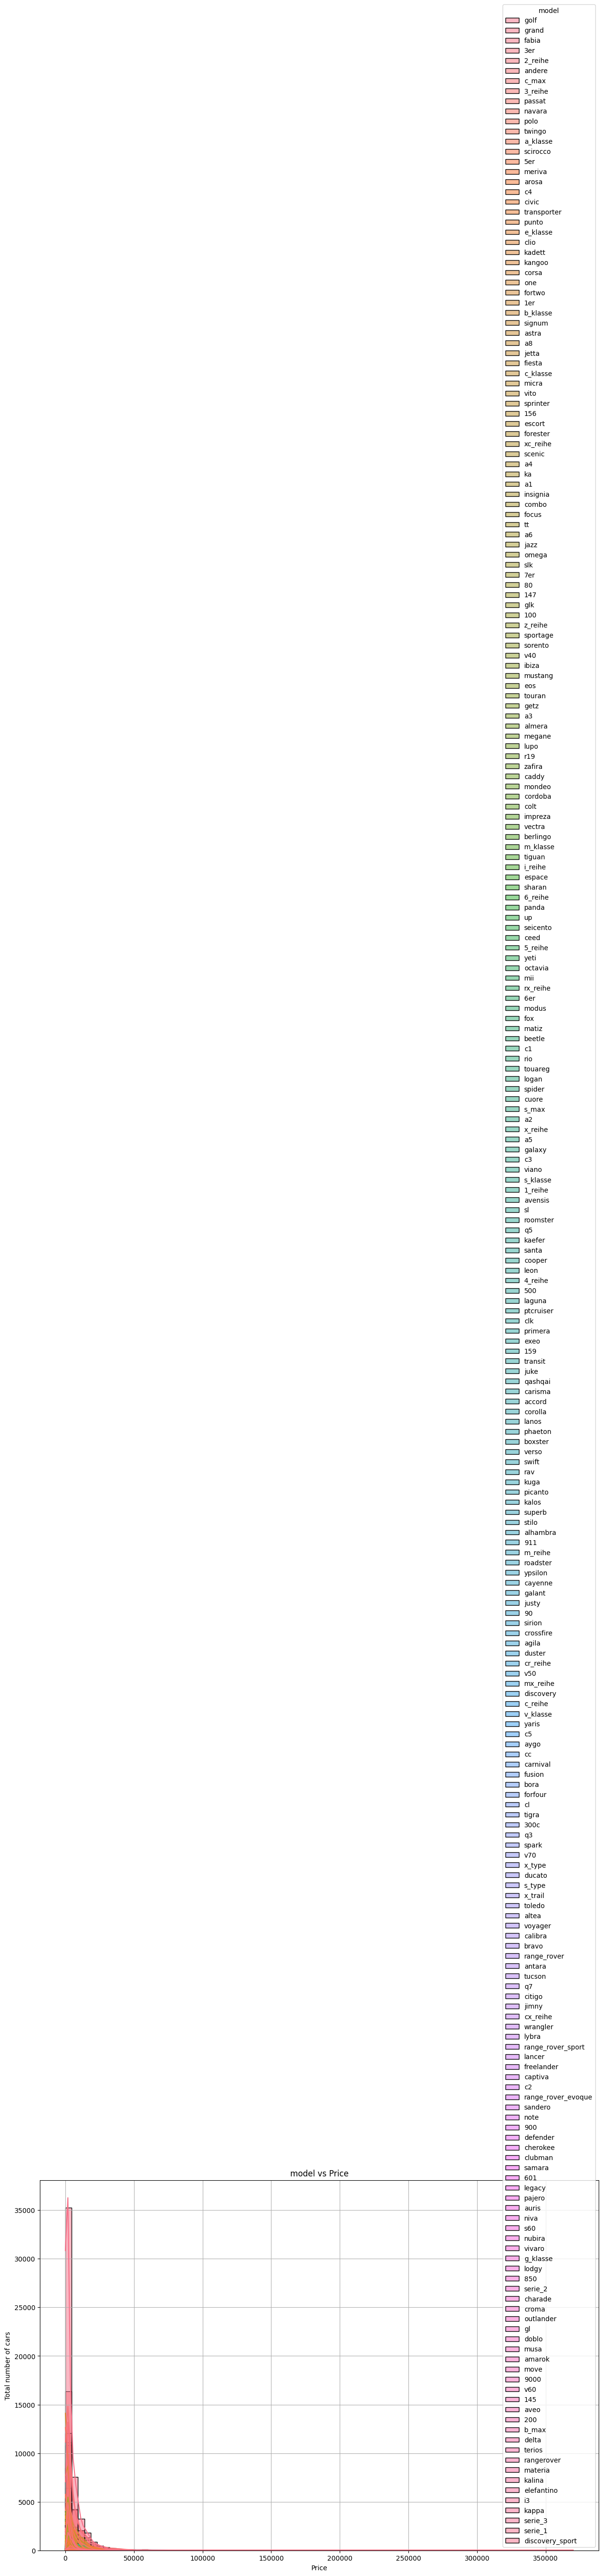

In [151]:
plt.figure(figsize=(15,10))
plt.title('model vs Price')
sns.histplot(data=df3,x='price',hue='model',kde=True,bins=80)
plt.xlabel('Price')
plt.ylabel('Total number of cars')
plt.grid()
plt.show()

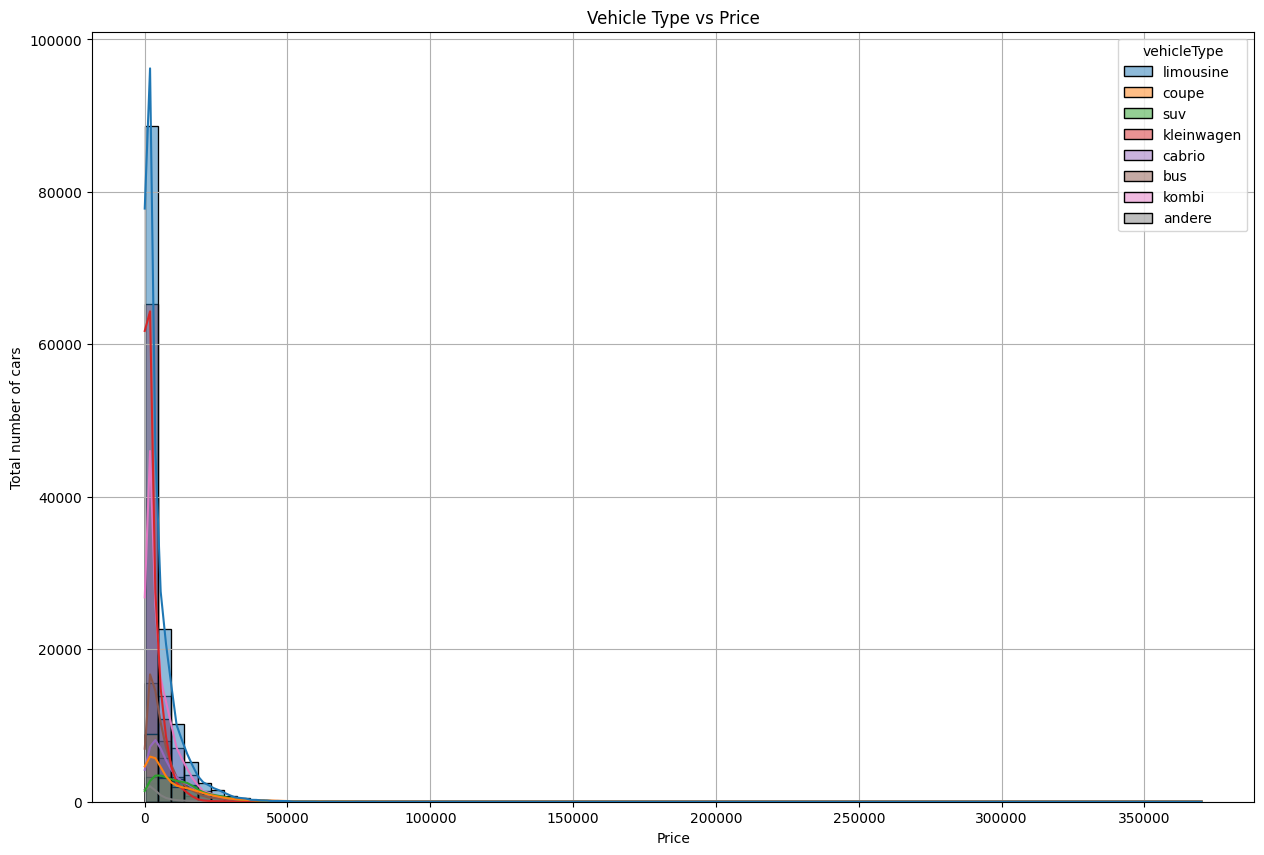

In [152]:
plt.figure(figsize=(15,10))
plt.title('Vehicle Type vs Price')
sns.histplot(data=df3,x='price',hue='vehicleType',kde=True,bins=80)
plt.xlabel('Price')
plt.ylabel('Total number of cars')
plt.grid()
plt.show()

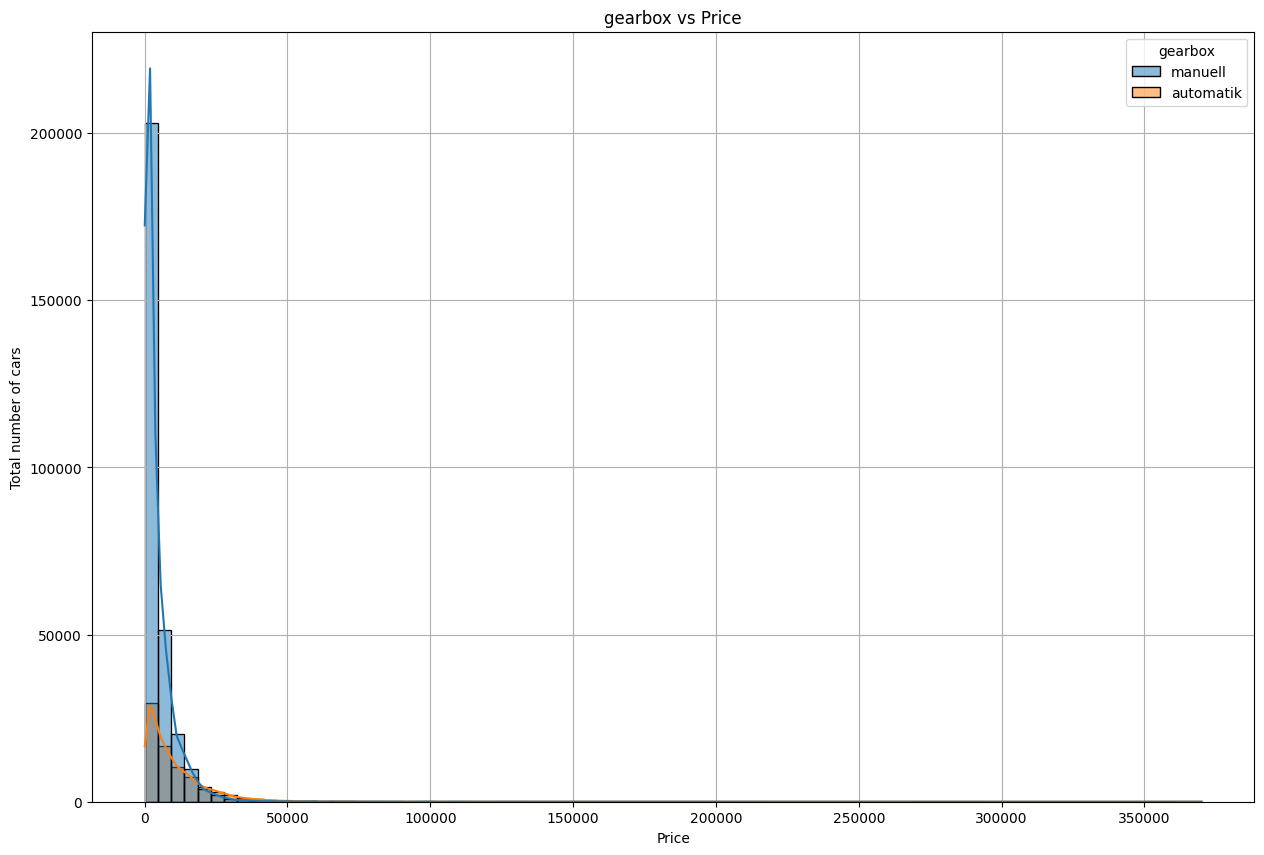

In [153]:
plt.figure(figsize=(15,10))
plt.title('gearbox vs Price')
sns.histplot(data=df3,x='price',hue='gearbox',kde=True,bins=80)
plt.xlabel('Price')
plt.ylabel('Total number of cars')
plt.grid()
plt.show()

In [154]:
df3.groupby('gearbox')['price'].mean()

gearbox
automatik    10501.208882
manuell       4498.870660
Name: price, dtype: float64

Automatic cars are costlier than manual, but most users prefer manual over automatic

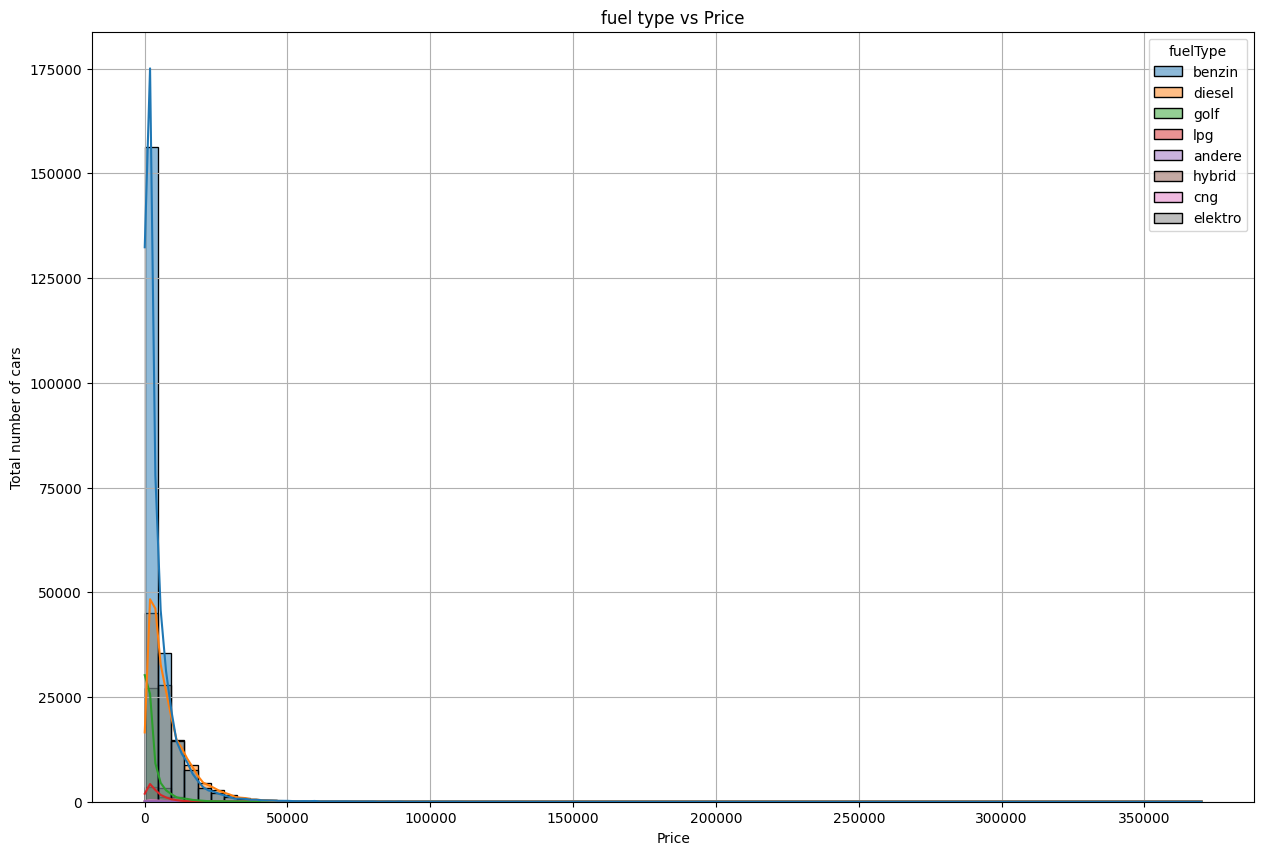

In [155]:
plt.figure(figsize=(15,10))
plt.title('fuel type vs Price')
sns.histplot(data=df3,x='price',hue='fuelType',kde=True,bins=80)
plt.xlabel('Price')
plt.ylabel('Total number of cars')
plt.grid()
plt.show()

In [156]:
df3.groupby('fuelType')['price'].mean()

fuelType
andere      3445.906250
benzin      4865.189974
cng         4700.382716
diesel      8469.965817
elektro    18493.000000
golf        2947.672371
hybrid     14675.786232
lpg         4325.070270
Name: price, dtype: float64

Most preferred fuetype is benzin,diesel and golf  

cars having electro and hyrid fuel type are on the price when compared to other types

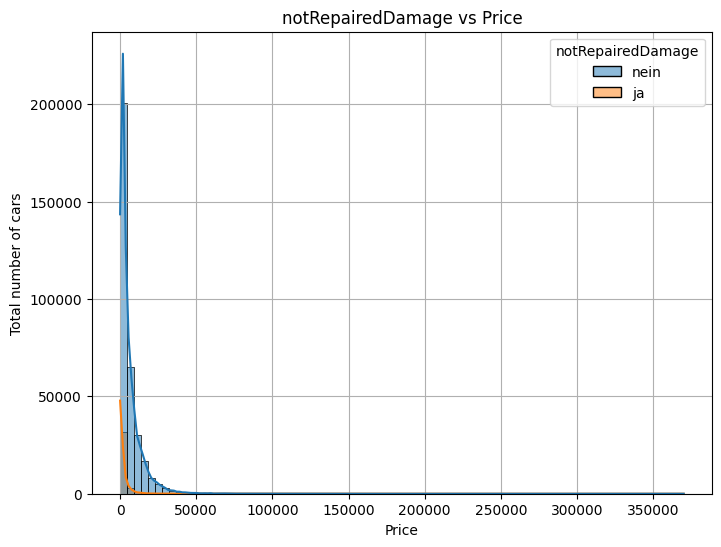

In [157]:
plt.figure(figsize=(8,6))
plt.title('notRepairedDamage vs Price')
sns.histplot(data=df3,x='price',hue='notRepairedDamage',kde=True,bins=80)
plt.xlabel('Price')
plt.ylabel('Total number of cars')
plt.grid()
plt.show()

In [158]:
df3['notRepairedDamage'].value_counts()

nein    333518
ja       35963
Name: notRepairedDamage, dtype: int64

In [159]:
df3.groupby('notRepairedDamage')['price'].mean()

notRepairedDamage
ja      2113.539304
nein    6139.961903
Name: price, dtype: float64

It clearly shows that cars with damage are having very less prices , one of import factors affecting the prices

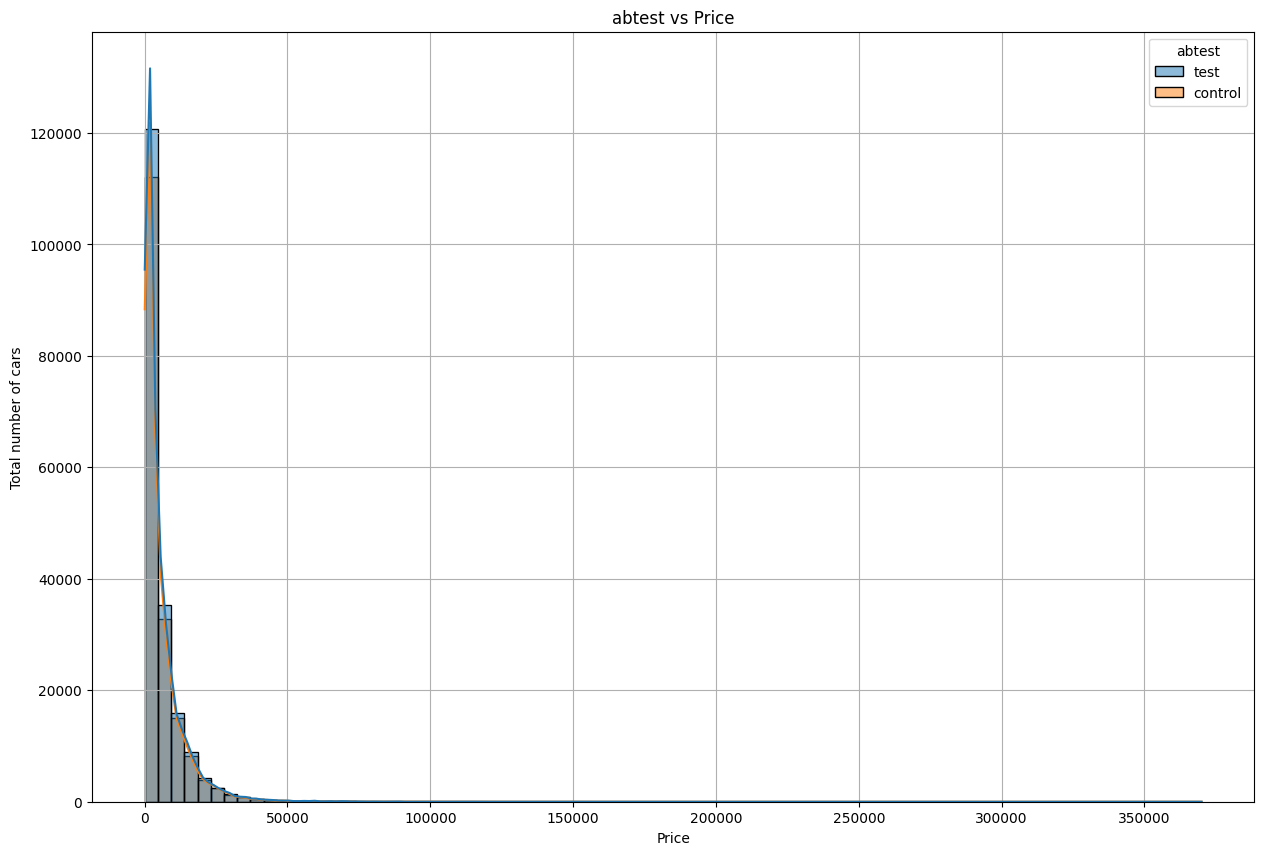

In [160]:
plt.figure(figsize=(15,10))
plt.title('abtest vs Price')
sns.histplot(data=df3,x='price',hue='abtest',kde=True,bins=80)
plt.xlabel('Price')
plt.ylabel('Total number of cars')
plt.grid()
plt.show()

In [161]:
df3.groupby('abtest')['price'].mean()

abtest
control    5733.884815
test       5761.220985
Name: price, dtype: float64

In [162]:
df3['abtest'].value_counts()

test       191524
control    177957
Name: abtest, dtype: int64

Cars with both abtest have similar price and are almost equaly distributed (almost equal number of cars for both)

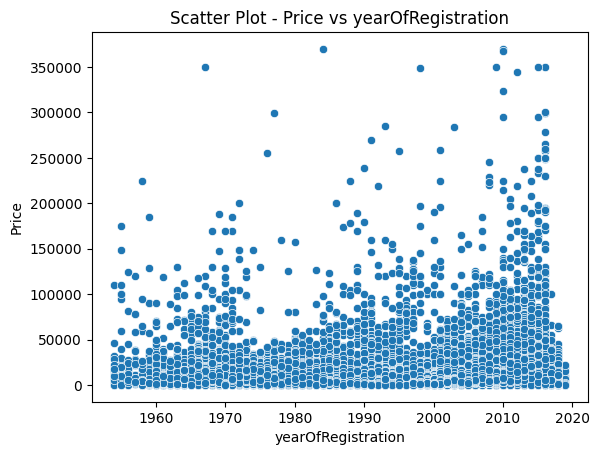

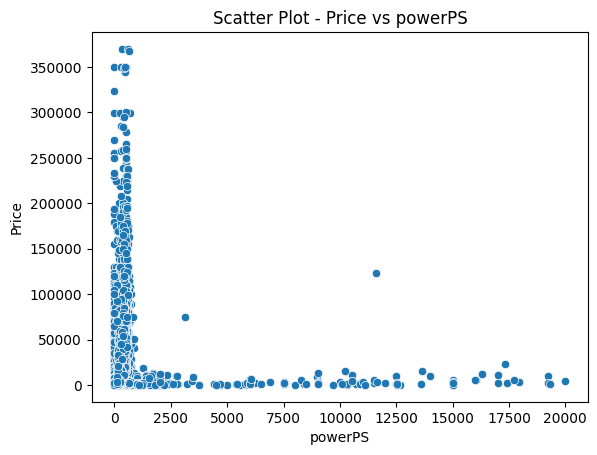

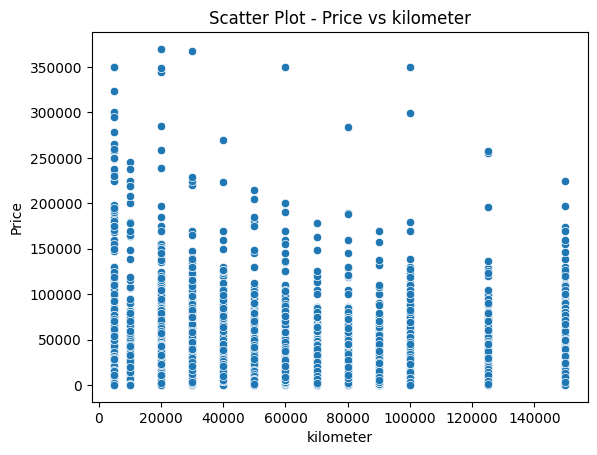

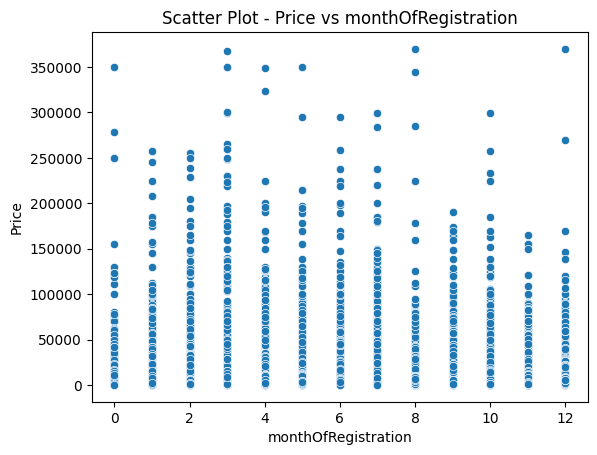

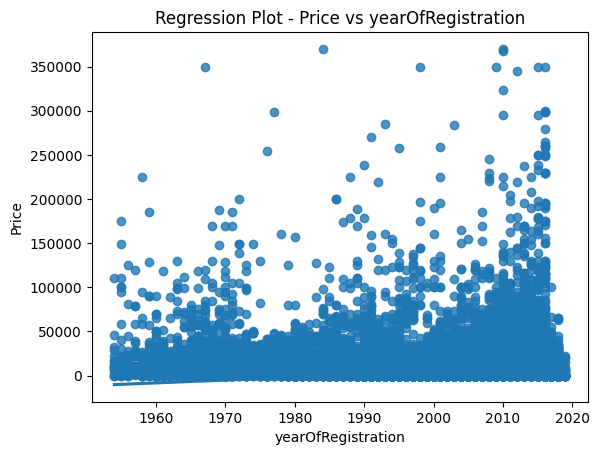

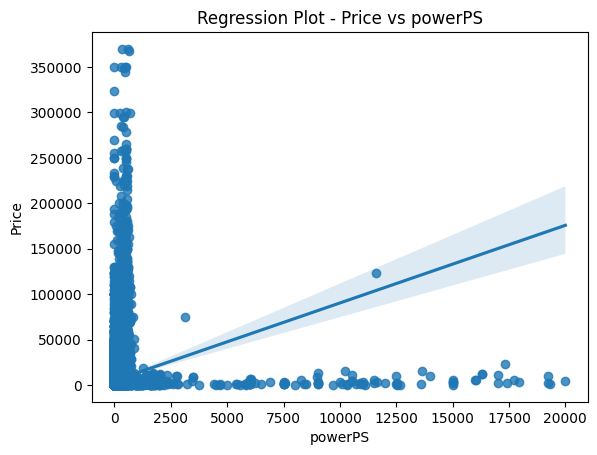

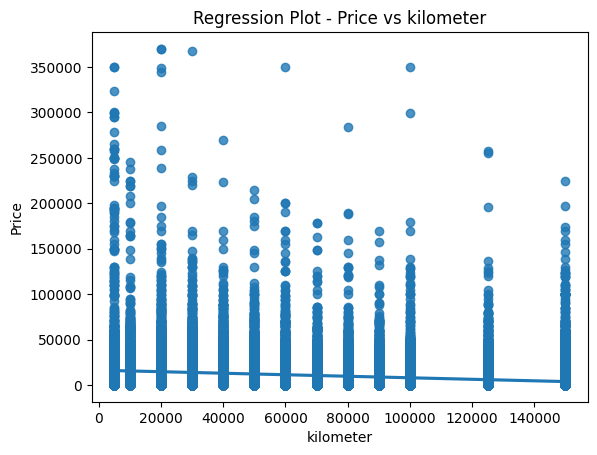

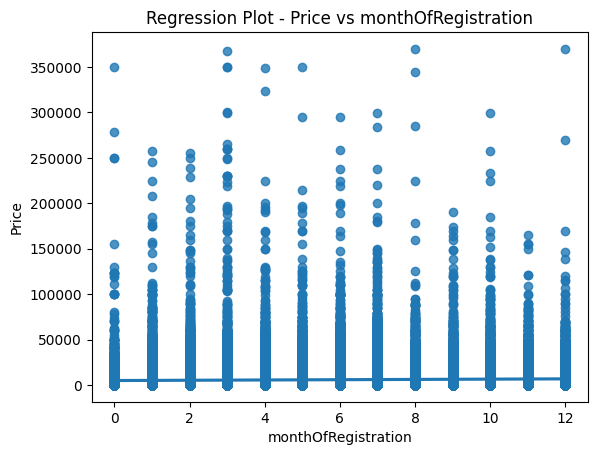

In [163]:

numerical_columns = ["yearOfRegistration", "powerPS", "kilometer", "monthOfRegistration"]


for column in numerical_columns:
    sns.scatterplot(x=df3[column], y=df3["price"])
    plt.title(f"Scatter Plot - Price vs {column}")
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.show()


for column in numerical_columns:
    sns.regplot(x=df3[column], y=df3["price"])
    plt.title(f"Regression Plot - Price vs {column}")
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.show()


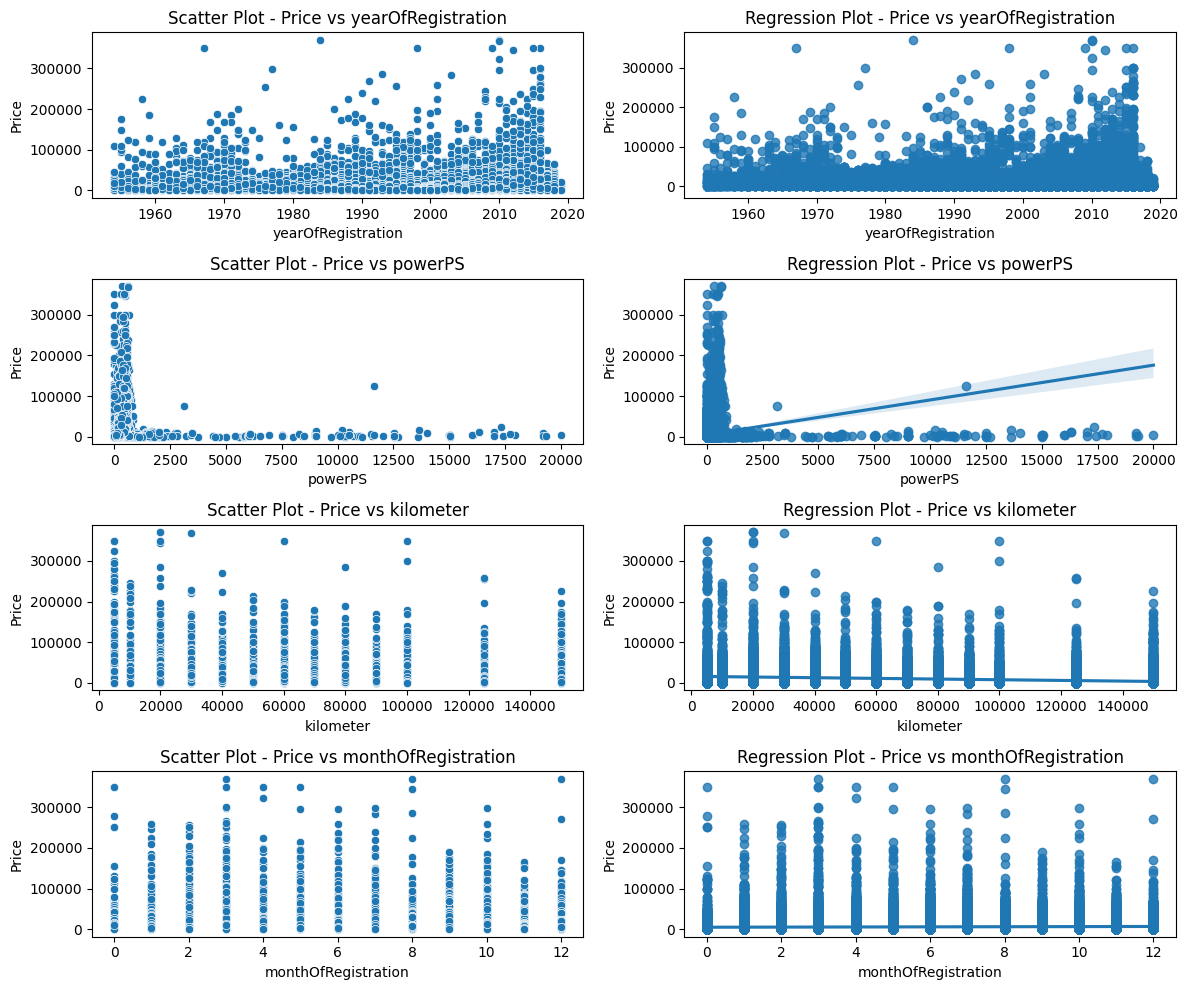

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 10))

for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=df3[column], y=df3["price"], ax=axes[i, 0])
    axes[i, 0].set_title(f"Scatter Plot - Price vs {column}")
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Price")

    sns.regplot(x=df3[column], y=df3["price"], ax=axes[i, 1])
    axes[i, 1].set_title(f"Regression Plot - Price vs {column}")
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel("Price")

plt.tight_layout()
plt.show()


In [165]:
numerical_variables = ["price", "yearOfRegistration", "powerPS", "kilometer", "monthOfRegistration"]
correlation_matrix = df3[numerical_variables].corr()


print(correlation_matrix)

                        price  yearOfRegistration   powerPS  kilometer  \
price                1.000000            0.273116  0.185634  -0.377430   
yearOfRegistration   0.273116            1.000000  0.054955  -0.233664   
powerPS              0.185634            0.054955  1.000000  -0.012388   
kilometer           -0.377430           -0.233664 -0.012388   1.000000   
monthOfRegistration  0.064348            0.046130  0.043290  -0.003485   

                     monthOfRegistration  
price                           0.064348  
yearOfRegistration              0.046130  
powerPS                         0.043290  
kilometer                      -0.003485  
monthOfRegistration             1.000000  


<Axes: >

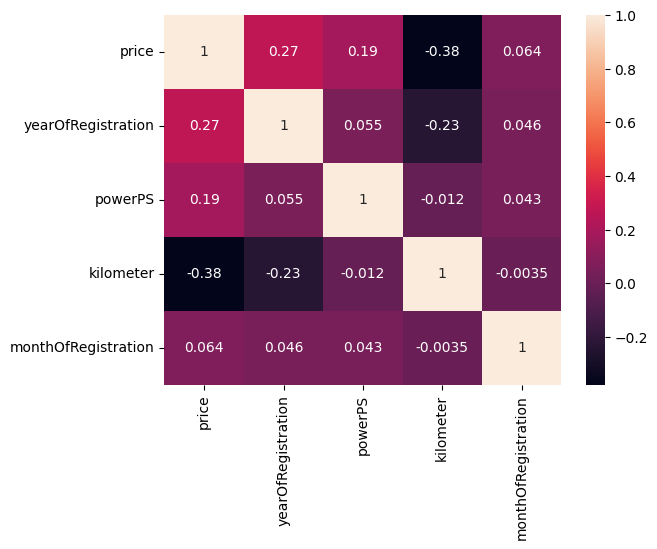

In [166]:
sns.heatmap(correlation_matrix,annot=True)

Text(0.5, 1.0, 'Spearman Correlatoin Matrix')

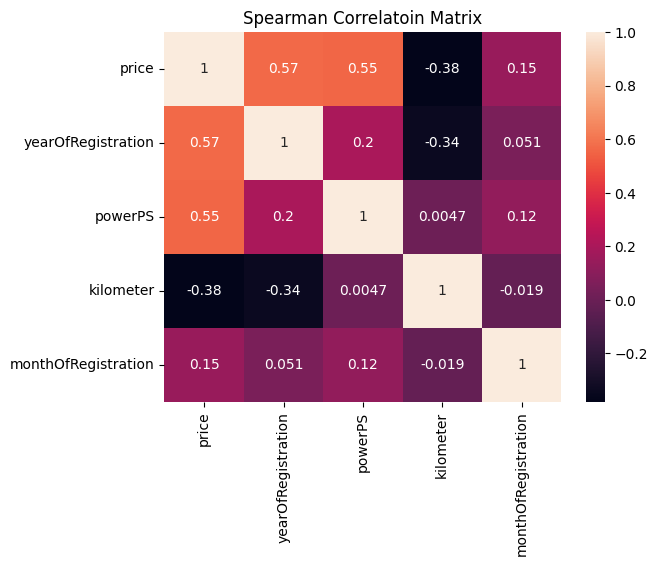

In [167]:
correlation_matrix_2 = df3[numerical_variables].corr(method='spearman')
sns.heatmap(correlation_matrix_2,annot=True)
plt.title('Spearman Correlatoin Matrix')

The correlation coefficient measures the strength and direction of the linear relationship between two variables, while the p-value tests the null hypothesis that the correlation coefficient is zero (no correlation)

In [168]:
from scipy.stats import pearsonr, spearmanr # numeric vs numeric


<Axes: xlabel='price', ylabel='Density'>

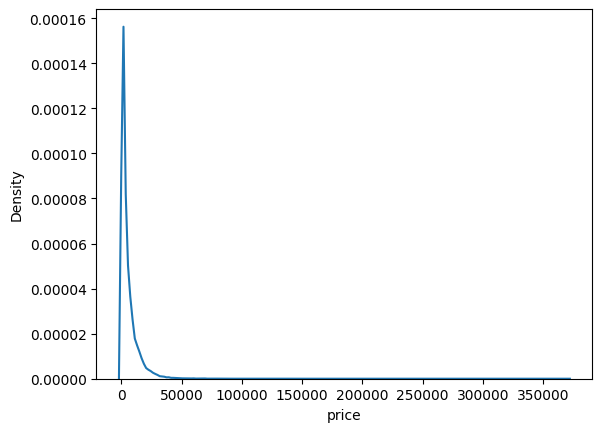

In [169]:
sns.kdeplot(df3['price'])

0.0
0.2731162777146561
Reject null hypothesis


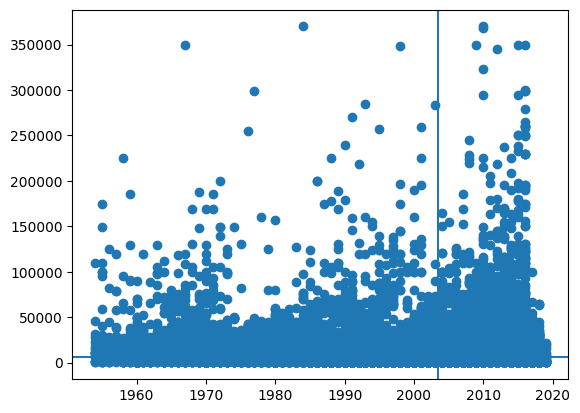

In [170]:
numerical_variables = ["price", "yearOfRegistration", "powerPS", "kilometer", "monthOfRegistration"]
x=df3['yearOfRegistration']
y=df3['price']
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
#Ha: x and y are correlated
corr_stat, p_value = pearsonr(x, y)
print(p_value)
print(corr_stat)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Uncorrelated")



0.0
-0.3774296153477259
Reject null hypothesis


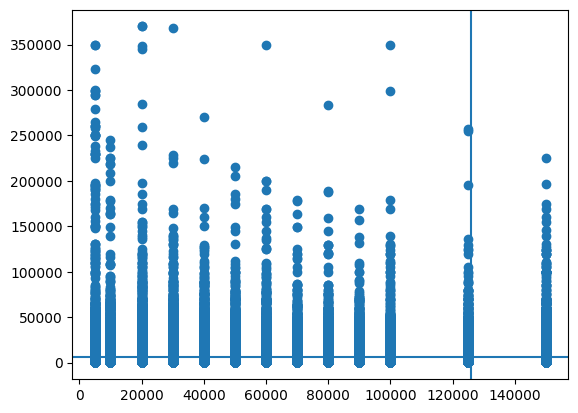

In [171]:
numerical_variables = ["price", "yearOfRegistration", "powerPS", "kilometer", "monthOfRegistration"]
x=df3['kilometer']
y=df3['price']
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
corr_stat, p_value = pearsonr(x, y)
print(p_value)
print(corr_stat)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Uncorrelated")




0.0
0.18563383818421197
Reject null hypothesis


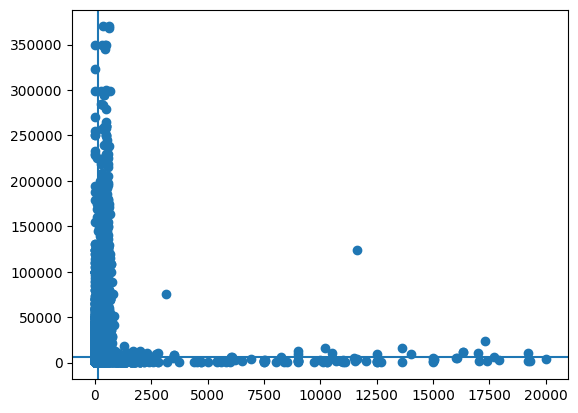

In [172]:
numerical_variables = ["price", "yearOfRegistration", "powerPS", "kilometer", "monthOfRegistration"]
x=df3['powerPS']
y=df3['price']
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
corr_stat, p_value = pearsonr(x, y)
print(p_value)
print(corr_stat)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Uncorrelated")




year of registration,price,powerps are correlated with price

these factors affect the price

the assumptions of Pearson correlation are violated, and the relationship is non-linear or the variables are not normally distributed  , spearman is used to calculate

0.0
0.5544386060210589
Reject null hypothesis


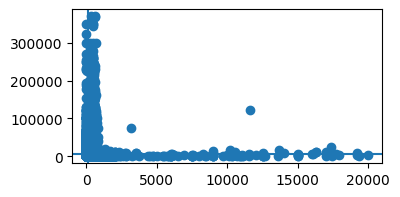

In [173]:
x=df3['powerPS']
y=df3['price']
plt.figure(figsize=(4,2))
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
# Ha: x and y are correlated
corr_stat, p_value = spearmanr(x, y)
print(p_value)
print(corr_stat)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Uncorrelated")

0.0
-0.37930942903939496
Reject null hypothesis


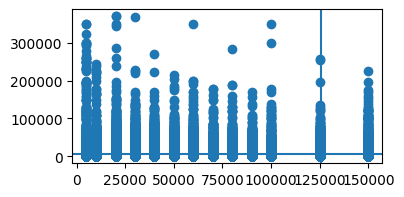

In [174]:
x=df3['kilometer']
y=df3['price']
plt.figure(figsize=(4,2))
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
corr_stat, p_value = spearmanr(x, y)
print(p_value)
print(corr_stat)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Uncorrelated")

0.0
0.5667447243644164
Reject null hypothesis, both are correlated


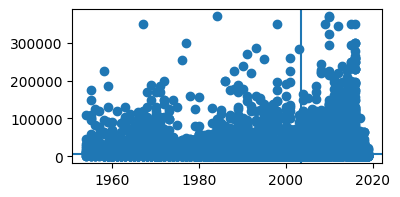

In [175]:
x=df3['yearOfRegistration']
y=df3['price']
plt.figure(figsize=(4,2))
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
corr_stat, p_value = spearmanr(x, y)
print(p_value)
print(corr_stat)
if p_value < 0.05:
    print("Reject null hypothesis, both are correlated")
else:
    print("Uncorrelated")

###Hypothesis testing

determine if there are statistically significant differences in car prices based on categorical variables

In [176]:
df3.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46


##Price vs Transmission

In [177]:
#checking if transmission has any statistical difference on price by using t test
from scipy.stats import  ttest_ind,f_oneway
a=df3[df3['gearbox']=='manuell']['price']
b=df3[df3['gearbox']=='automatik']['price']

In [178]:
print(a.mean())
print(b.mean())
ttest_ind(a,b)

4498.87066025032
10501.20888224202


Ttest_indResult(statistic=-174.80188259347656, pvalue=0.0)

In [179]:
# H0= both manual and automatic cars have same price
# Ha = Prices are different
alpha=0.05
t_stat,p_value=ttest_ind(a,b,alternative='less')
print(t_stat,p_value)
if p_value<alpha:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')


-174.80188259347656 0.0
Reject the null hypothesis


Price of manual cars are lesser than automatic cars

In [180]:
df3['fuelType'].value_counts()

benzin     222952
diesel     107538
golf        32488
lpg          5365
cng           567
hybrid        276
andere        192
elektro       103
Name: fuelType, dtype: int64

##checking the assumptions of annova test

In [181]:
#Shapiro Test
#H0: data is gaussian
#Ha: data is not gaussian
from scipy.stats import shapiro,kruskal
test_statistic,p_value=shapiro(df['price'].sample(50000))
print(test_statistic)
print(p_value)
if p_value<0.05:
  print('Reject null hypothesis , data is not normal ')
else:
  print('data is guassian')

0.0005051493644714355
0.0
Reject null hypothesis , data is not normal 


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


data doesnot satisfy the assumptions, kruskal test can be used

In [182]:
df3.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


##Price vs ABtest

In [183]:
a1=df3[df3['abtest']=='test']['price']
a1.mean()


5761.220985359537

In [184]:
b1=df3[df3['abtest']=='control']['price']
b1.mean()

5733.8848148710085

In [185]:
# H0= both control and test have same mean prices
# Ha = Prices are different
alpha=0.05
t_stat,p_value=ttest_ind(a1,b1)
print(t_stat)
print(p_value)
if p_value<alpha:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')


0.9416796909139511
0.3463572715768244
Fail to reject the null hypothesis


##price and vehicle Type

In [186]:
df3['vehicleType'].value_counts()

limousine     132537
kleinwagen     79791
kombi          67375
bus            30123
cabrio         22805
coupe          18897
suv            14655
andere          3298
Name: vehicleType, dtype: int64

In [187]:
df3.groupby('vehicleType')['price'].mean()

vehicleType
andere         4238.777744
bus            6644.965408
cabrio        10479.032098
coupe         11359.240409
kleinwagen     2739.842188
kombi          5715.874271
limousine      4978.915246
suv           13129.245036
Name: price, dtype: float64

In [188]:
li=df3[df3['vehicleType']=='limousine']['price']
kl=df3[df3['vehicleType']=='kleinwagen']['price']
ko=df3[df3['vehicleType']=='kombi']['price']
bu=df3[df3['vehicleType']=='bus']['price']
ca=df3[df3['vehicleType']=='cabrio']['price']
co=df3[df3['vehicleType']=='coupe']['price']
su=df3[df3['vehicleType']=='suv']['price']
an=df3[df3['vehicleType']=='andere']['price']


In [189]:
#Kruskal test
#H0: all vehicle types have same mean pric
#Ha: prices are different for different types
t_stat,p_value=kruskal(
li,kl,ko,bu,ca,co,su,an)
print(t_stat)
print(p_value)
if p_value<alpha:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

46612.884857762816
0.0
Reject the null hypothesis


In [190]:
#Checking if fuel type have any significance on price using annova
fuel_types=df3['fuelType'].unique()
fuel_types

array(['benzin', 'diesel', 'golf', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [191]:
fuel_type_groups = []
for fuel_type in fuel_types:
  fuel_type_groups.append(df3[df3['fuelType']==fuel_type]['price'])

In [192]:
fuel_type_groups

[0           480
 3          1500
 5           650
 6          2200
 7            50
           ...  
 371520     3200
 371521     1150
 371522       50
 371524     1199
 371527    28990
 Name: price, Length: 222952, dtype: int64,
 1         18300
 2          9800
 4          3600
 11         2799
 14        17999
           ...  
 371513     4400
 371517     7900
 371518     3999
 371525     9200
 371526     3400
 Name: price, Length: 107538, dtype: int64,
 9          999
 13        2500
 26        5555
 36        1600
 41        7500
           ... 
 371496    3850
 371504    2600
 371509    1900
 371519    5250
 371523    2200
 Name: price, Length: 32488, dtype: int64,
 157          50
 257        6799
 357        3900
 369         699
 390       21500
           ...  
 371047     7500
 371063     2990
 371283      450
 371383     6300
 371491     3200
 Name: price, Length: 5365, dtype: int64,
 375       6500
 406       2350
 1634       850
 4745        50
 11106      900
          

In [193]:
f_statistic,p_value=f_oneway(*fuel_type_groups)
anova_results = pd.DataFrame({'Fuel Type': fuel_types, 'Price': fuel_type_groups})
anova_results = anova_results.append({'Fuel Type': 'Overall', 'Price': df3['price']}, ignore_index=True)


<ipython-input-193-b8a6a75470d4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({'Fuel Type': 'Overall', 'Price': df3['price']}, ignore_index=True)


In [194]:
print("ANOVA Results:")
print(anova_results)
print("\nF-Statistic:", f_statistic)
print("p-value:", p_value)

ANOVA Results:
  Fuel Type                                              Price
0    benzin  0           480
3          1500
5           65...
1    diesel  1         18300
2          9800
4          360...
2      golf  9          999
13        2500
26        5555
3...
3       lpg  157          50
257        6799
357        390...
4    andere  375       6500
406       2350
1634       850
4...
5    hybrid  1123       5750
4467      20880
4951       420...
6       cng  2420       8600
3382       7649
3826       799...
7   elektro  3395         50
7089      15500
13184      599...
8   Overall  0           480
1         18300
2          980...

F-Statistic: 2454.9860777089766
p-value: 0.0


In [195]:
df3.groupby('notRepairedDamage')['price'].mean()

notRepairedDamage
ja      2113.539304
nein    6139.961903
Name: price, dtype: float64

In [196]:
df3.groupby('seller')['price'].mean()

seller
gewerblich    2700.000000
privat        5748.079528
Name: price, dtype: float64

In [197]:
df3.groupby('vehicleType')['price'].mean()

vehicleType
andere         4238.777744
bus            6644.965408
cabrio        10479.032098
coupe         11359.240409
kleinwagen     2739.842188
kombi          5715.874271
limousine      4978.915246
suv           13129.245036
Name: price, dtype: float64

In [198]:
df3['brand'].value_counts()

volkswagen        79274
bmw               40048
opel              39896
mercedes_benz     35150
audi              32736
ford              25436
renault           17896
peugeot           10984
fiat               9631
seat               7001
mazda              5673
skoda              5634
smart              5229
citroen            5145
nissan             5027
toyota             4685
sonstige_autos     3719
hyundai            3634
mini               3389
volvo              3315
mitsubishi         3045
honda              2828
kia                2551
suzuki             2324
alfa_romeo         2322
porsche            2174
chevrolet          1828
chrysler           1440
dacia               899
daihatsu            805
jeep                791
land_rover          768
subaru              768
jaguar              613
trabant             569
daewoo              539
saab                526
rover               485
lancia              479
lada                225
Name: brand, dtype: int64

In [199]:
#come up with a rule based system to predict the price using significant features
df3.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,50,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,nein,2016-04-04,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,golf,volkswagen,nein,2016-03-17,0,27472,2016-03-31 17:17:06


##Manual Machine learning - Statistical Model

In [200]:
#mean prices brand gearbox no of damage kilometer year of regsitration
#lineplot between price and kilometer

features=['vehicle_type','gearbox','seller','brand','notRepairedDamage','yearOfRegistration','kilometer']

In [201]:
df3['model'].value_counts()

golf               49868
andere             26131
3er                20480
polo               13036
corsa              12510
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [202]:
df3.head(1)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57


In [203]:
df3.groupby(['brand','gearbox','model','vehicleType','seller','fuelType','notRepairedDamage'])['kilometer','price'].median().reset_index()

<ipython-input-203-dc4437513e39>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3.groupby(['brand','gearbox','model','vehicleType','seller','fuelType','notRepairedDamage'])['kilometer','price'].median().reset_index()


,brand,gearbox,model,vehicleType,seller,fuelType,notRepairedDamage,kilometer,price
0,alfa_romeo,automatik,147,coupe,privat,benzin,ja,150000.0,800.0
1,alfa_romeo,automatik,147,kleinwagen,privat,benzin,ja,137500.0,800.0
2,alfa_romeo,automatik,147,kleinwagen,privat,benzin,nein,150000.0,790.0
3,alfa_romeo,automatik,147,limousine,privat,benzin,ja,100000.0,1666.0
4,alfa_romeo,automatik,147,limousine,privat,benzin,nein,150000.0,2940.0
...,...,...,...,...,...,...,...,...,...
9762,volvo,manuell,xc_reihe,limousine,privat,golf,nein,90000.0,50.0
9763,volvo,manuell,xc_reihe,suv,privat,benzin,nein,150000.0,6499.0
9764,volvo,manuell,xc_reihe,suv,privat,diesel,ja,150000.0,9850.0
9765,volvo,manuell,xc_reihe,suv,privat,diesel,nein,150000.0,15999.0


In [227]:
# Calculate the mean or median price for each vehicle type
price_stats = df3.groupby('vehicleType')['price'].mean()

In [205]:
# Define the price range based on the mean or median price
price_ranges = {}
for vehicle_type, price_stat in price_stats.items():
    # Adjust the range as needed based on your market knowledge
    price_range = (round(price_stat,2) - 2000, round(price_stat,2) + 2000)
    price_ranges[vehicle_type] = price_range
price_ranges


{'andere': (2238.7799999999997, 6238.78),
 'bus': (4644.97, 8644.970000000001),
 'cabrio': (8479.03, 12479.03),
 'coupe': (9359.24, 13359.24),
 'kleinwagen': (739.8400000000001, 4739.84),
 'kombi': (3715.87, 7715.87),
 'limousine': (2978.92, 6978.92),
 'suv': (11129.25, 15129.25)}

In [207]:
# Apply price range based on vehicle type
df3['price_estimate'] = df3.apply(lambda row: price_ranges[row['vehicleType']], axis=1)
df3.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,price_estimate
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,...,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57,"(2978.92, 6978.92)"
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,"(9359.24, 13359.24)"
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46,"(11129.25, 15129.25)"
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,"(739.8400000000001, 4739.84)"
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,"(739.8400000000001, 4739.84)"


In [ ]:
##df3['price_range']=df3['vehicleType'].map(price_ranges)
#df3.head()

##gearbox adjustment

In [208]:
gearbox_prices = df3.groupby('gearbox')['price'].mean()  # or median()
gearbox_prices

gearbox
automatik    10501.208882
manuell       4498.870660
Name: price, dtype: float64

In [209]:
gearbox_difference = gearbox_prices['automatik'] - gearbox_prices['manuell']
gearbox_difference

6002.338221991699

In [210]:
gearbox_adjustment = gearbox_difference  # or a fraction of the difference, depending on the desired adjustment
gearbox_adjustments = {
    'manuell': -gearbox_adjustment,
    'automatik': gearbox_adjustment,
}
df3['price_estimate'] = df3.apply(lambda row: (row['price_estimate'][0] + gearbox_adjustments.get(row['gearbox'], 0),
                                             row['price_estimate'][1] + gearbox_adjustments.get(row['gearbox'], 0)), axis=1)

pd.set_option('display.max_columns', None)
df3.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,price_estimate
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57,"(-3023.4182219916993, 976.5817780083007)"
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,"(3356.9017780083004, 7356.9017780083)"
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46,"(17131.5882219917, 21131.5882219917)"
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,"(-5262.498221991699, -1262.4982219916992)"
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,"(-5262.498221991699, -1262.4982219916992)"


##brand adjustment

In [211]:
df3['brand'].value_counts()

volkswagen        79274
bmw               40048
opel              39896
mercedes_benz     35150
audi              32736
ford              25436
renault           17896
peugeot           10984
fiat               9631
seat               7001
mazda              5673
skoda              5634
smart              5229
citroen            5145
nissan             5027
toyota             4685
sonstige_autos     3719
hyundai            3634
mini               3389
volvo              3315
mitsubishi         3045
honda              2828
kia                2551
suzuki             2324
alfa_romeo         2322
porsche            2174
chevrolet          1828
chrysler           1440
dacia               899
daihatsu            805
jeep                791
land_rover          768
subaru              768
jaguar              613
trabant             569
daewoo              539
saab                526
rover               485
lancia              479
lada                225
Name: brand, dtype: int64

In [212]:
brand_list=list(df3['brand'].unique())
brand_list

['volkswagen',
 'audi',
 'jeep',
 'skoda',
 'bmw',
 'peugeot',
 'ford',
 'mazda',
 'nissan',
 'renault',
 'mercedes_benz',
 'opel',
 'seat',
 'citroen',
 'honda',
 'fiat',
 'mini',
 'smart',
 'hyundai',
 'alfa_romeo',
 'subaru',
 'volvo',
 'mitsubishi',
 'kia',
 'suzuki',
 'lancia',
 'porsche',
 'sonstige_autos',
 'toyota',
 'chevrolet',
 'dacia',
 'daihatsu',
 'trabant',
 'saab',
 'chrysler',
 'jaguar',
 'daewoo',
 'rover',
 'land_rover',
 'lada']

In [213]:
brand_list=list(df3['brand'].unique())
brand_list
'''# Calculate average prices for each brand
brand_avg_prices = df.groupby('brand')['price'].mean()

# Define the reference brand (e.g., Volkswagen)
reference_brand = 'volkswagen'
reference_price = brand_avg_prices[reference_brand]

# Calculate brand adjustments relative to the reference brand
brand_adjustments = {}
for brand, price in brand_avg_prices.items():
    adjustment = round((price - reference_price) / 100) * 100  # Round to the nearest hundred
    brand_adjustments[brand] = adjustment

# Print the brand adjustments
print(brand_adjustments)'''
'''df3['price_estimate'] = df3.apply(lambda row: (row['price_estimate'][0] + brand_adjustments.get(row['brand'], 0),
                                             row['price_estimate'][1] + brand_adjustments.get(row['brand'], 0)), axis=1)
pd.set_option('display.max_columns', None)
df3.head()'''

"# Calculate average prices for each brand\nbrand_avg_prices = df.groupby('brand')['price'].mean()\n\n# Define the reference brand (e.g., Volkswagen)\nreference_brand = 'volkswagen'\nreference_price = brand_avg_prices[reference_brand]\n\n# Calculate brand adjustments relative to the reference brand\nbrand_adjustments = {}\nfor brand, price in brand_avg_prices.items():\n    adjustment = round((price - reference_price) / 100) * 100  # Round to the nearest hundred\n    brand_adjustments[brand] = adjustment\n\n# Print the brand adjustments\nprint(brand_adjustments)"

In [214]:
'''df3['price_estimate'] = df3.apply(lambda row: (row['price_estimate'][0] + brand_adjustments.get(row['brand'], 0),
                                             row['price_estimate'][1] + brand_adjustments.get(row['brand'], 0)), axis=1)
pd.set_option('display.max_columns', None)
df3.head()'''

"df3['price_estimate'] = df3.apply(lambda row: (row['price_estimate'][0] + brand_adjustments.get(row['brand'], 0),\n                                             row['price_estimate'][1] + brand_adjustments.get(row['brand'], 0)), axis=1)\npd.set_option('display.max_columns', None)\ndf3.head()"

##Seller adjustments

In [215]:
seller_avg_prices=df3.groupby('seller')['price'].mean()
seller_avg_prices

seller
gewerblich    2700.000000
privat        5748.079528
Name: price, dtype: float64

In [216]:
seller_difference=seller_avg_prices['privat']-seller_avg_prices['gewerblich']
seller_difference

3048.079528415765

In [217]:
df4=df3.copy()
seller_adjustment=seller_difference
seller_adjustments={'gewerblich':-seller_difference,
                    'privat':seller_difference}
df4['price_estimate'] = df4.apply(lambda row: (row['price_estimate'][0] + seller_adjustments.get(row['seller'], 0),
                                             row['price_estimate'][1] + seller_adjustments.get(row['seller'], 0)), axis=1)
pd.set_option('display.max_columns', None)
df4.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,price_estimate
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57,"(24.661306424065515, 4024.6613064240655)"
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,"(6404.981306424065, 10404.981306424066)"
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46,"(20179.667750407465, 24179.667750407465)"
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,"(-2214.4186935759344, 1785.5813064240656)"
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,"(-2214.4186935759344, 1785.5813064240656)"


##Not repaired damage adjustments

In [218]:
df3['notRepairedDamage'].value_counts()

nein    333518
ja       35963
Name: notRepairedDamage, dtype: int64

In [219]:
damage_avg_prices=df3.groupby('notRepairedDamage')['price'].mean()
damage_avg_prices

notRepairedDamage
ja      2113.539304
nein    6139.961903
Name: price, dtype: float64

In [220]:
damage_diff=damage_avg_prices['nein']-damage_avg_prices['ja']
damage_diff

4026.4225988207195

In [221]:
damage_adjustment=damage_diff
damage_adjustments={'ja':-damage_diff,
                    'nein':damage_diff}
df4['price_estimate'] = df4.apply(lambda row: (row['price_estimate'][0] + damage_adjustments.get(row['notRepairedDamage'], 0),
                                             row['price_estimate'][1] + damage_adjustments.get(row['notRepairedDamage'], 0)), axis=1)
df4.head() #create a function

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,price_estimate
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57,"(4051.083905244785, 8051.083905244785)"
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,"(2378.5587076033457, 6378.558707603346)"
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46,"(24206.090349228183, 28206.090349228183)"
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,"(1812.003905244785, 5812.003905244785)"
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,"(1812.003905244785, 5812.003905244785)"


In [222]:
df4['model'].value_counts()

golf               49868
andere             26131
3er                20480
polo               13036
corsa              12510
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [223]:
df4.groupby('model')['price'].mean()

model
100         1791.567633
145          845.875000
147         2283.319859
156         1542.794498
159         7062.240566
               ...     
yaris       3881.982575
yeti       14654.351759
ypsilon     1405.000000
z_reihe    14825.769144
zafira      3744.679644
Name: price, Length: 251, dtype: float64

In [224]:
df4.sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,price_estimate
158273,2016-03-21 18:49:01,Volkswagen_Lupo_1.0,privat,Angebot,1490,test,kleinwagen,2000,manuell,50,lupo,150000,7,benzin,volkswagen,nein,2016-03-21,0,59872,2016-03-21 18:49:01,"(1812.003905244785, 5812.003905244785)"
347189,2016-03-12 16:40:17,***_Volkswagen_Golf_IV_1.4__75_Ps__TÜV_NEU_***,privat,Angebot,1500,control,limousine,1999,manuell,75,golf,150000,12,benzin,volkswagen,nein,2016-03-12,0,24594,2016-03-12 16:40:17,"(4051.083905244785, 8051.083905244785)"
213208,2016-03-10 20:59:42,BMW_318i,privat,Angebot,3600,test,limousine,2004,manuell,140,3er,150000,11,benzin,bmw,nein,2016-03-10,0,46499,2016-04-06 09:17:47,"(4051.083905244785, 8051.083905244785)"
188052,2016-03-12 10:50:41,VW_Kaefer_Cab._1303_LS,privat,Angebot,18500,control,cabrio,1979,manuell,50,kaefer,150000,7,golf,volkswagen,nein,2016-03-12,0,47803,2016-03-26 15:15:24,"(9551.193905244785, 13551.193905244787)"
77134,2016-03-09 14:56:08,Fiat_punto,privat,Angebot,1000,test,limousine,2000,manuell,60,golf,150000,0,benzin,fiat,nein,2016-03-09,0,32816,2016-03-10 11:16:59,"(4051.083905244785, 8051.083905244785)"


In [225]:
df3['offerType'].value_counts() # we can ignore offertype as its imbalanced

Angebot    369469
Gesuch         12
Name: offerType, dtype: int64

In [226]:
df['yearOfRegistration']

0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
371523    2005
371524    2000
371525    1996
371526    2002
371527    2013
Name: yearOfRegistration, Length: 371528, dtype: int64

In [241]:
df4.loc[:,['vehicleType','gearbox','seller','notRepairedDamage','price','price_estimate']].sample(10)

,vehicleType,gearbox,seller,notRepairedDamage,price,price_estimate
339939,kombi,manuell,privat,nein,3700,"(4788.033905244785, 8788.033905244785)"
195454,kombi,manuell,privat,nein,13900,"(4788.033905244785, 8788.033905244785)"
347177,limousine,manuell,privat,nein,250,"(4051.083905244785, 8051.083905244785)"
342641,limousine,manuell,privat,nein,11999,"(4051.083905244785, 8051.083905244785)"
303106,kleinwagen,manuell,privat,nein,150,"(1812.003905244785, 5812.003905244785)"
311234,kleinwagen,manuell,privat,nein,2700,"(1812.003905244785, 5812.003905244785)"
63148,kleinwagen,manuell,privat,nein,550,"(1812.003905244785, 5812.003905244785)"
28450,limousine,manuell,privat,nein,3000,"(4051.083905244785, 8051.083905244785)"
270672,kombi,manuell,privat,nein,999,"(4788.033905244785, 8788.033905244785)"
365315,limousine,manuell,privat,nein,700,"(4051.083905244785, 8051.083905244785)"


In [246]:
def get_rows_in_price_range(dataframe):
    return dataframe[dataframe['price'].between(dataframe['price_estimate'].apply(lambda x: x[0]), dataframe['price_estimate'].apply(lambda x: x[1]))]
result = get_rows_in_price_range(df4)


In [247]:
result.loc[:,['vehicleType','gearbox','seller','notRepairedDamage','price','price_estimate']]

,vehicleType,gearbox,seller,notRepairedDamage,price,price_estimate
4,kleinwagen,manuell,privat,nein,3600,"(1812.003905244785, 5812.003905244785)"
18,bus,manuell,privat,nein,7550,"(5717.133905244786, 9717.133905244786)"
26,limousine,manuell,privat,nein,5555,"(4051.083905244785, 8051.083905244785)"
27,limousine,manuell,privat,nein,6900,"(4051.083905244785, 8051.083905244785)"
33,limousine,automatik,privat,nein,18000,"(16055.760349228183, 20055.76034922818)"
...,...,...,...,...,...,...
371506,limousine,manuell,privat,nein,5900,"(4051.083905244785, 8051.083905244785)"
371507,kombi,manuell,privat,nein,5999,"(4788.033905244785, 8788.033905244785)"
371513,limousine,manuell,privat,nein,4400,"(4051.083905244785, 8051.083905244785)"
371517,limousine,manuell,privat,nein,7900,"(4051.083905244785, 8051.083905244785)"


In [248]:
brand_list=list(df3['brand'].unique())
brand_list
# Calculate average prices for each brand
brand_avg_prices = df.groupby('brand')['price'].mean()

# Define the reference brand (e.g., Volkswagen)
reference_brand = 'skoda'
reference_price = brand_avg_prices[reference_brand]

# Calculate brand adjustments relative to the reference brand
brand_adjustments = {}
for brand, price in brand_avg_prices.items():
    adjustment = round((price - reference_brand / 100) * 100  # Round to the nearest hundred
    brand_adjustments[brand] = adjustment

# Print the brand adjustments
print(brand_adjustments)
df5=df4.copy()
df5['price_estimate'] = df5.apply(lambda row: (row['price_estimate'][0] + brand_adjustments.get(row['brand'], 0),
                                             row['price_estimate'][1] + brand_adjustments.get(row['brand'], 0)), axis=1)
pd.set_option('display.max_columns', None)
df5.head()

{'alfa_romeo': 29300, 'audi': 9500, 'bmw': 8400, 'chevrolet': 1000, 'chrysler': -2500, 'citroen': 2500, 'dacia': -600, 'daewoo': -5400, 'daihatsu': -4700, 'fiat': -1100, 'ford': 2100, 'honda': -2600, 'hyundai': -1000, 'jaguar': 7800, 'jeep': 5600, 'kia': -800, 'lada': -3400, 'lancia': -3200, 'land_rover': 10300, 'mazda': -700, 'mercedes_benz': 10800, 'mini': 3400, 'mitsubishi': -3100, 'nissan': -1900, 'opel': -3200, 'peugeot': -3200, 'porsche': 44700, 'renault': -4100, 'rover': -4900, 'saab': -2600, 'seat': -2100, 'skoda': 0, 'smart': -2900, 'sonstige_autos': 609200, 'subaru': -2200, 'suzuki': -2000, 'toyota': -1200, 'trabant': 14000, 'volkswagen': 8100, 'volvo': 2400}


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,price_estimate
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57,"(12151.083905244785, 16151.083905244785)"
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,"(11878.558707603346, 15878.558707603346)"
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46,"(29806.090349228183, 33806.09034922818)"
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,"(9912.003905244785, 13912.003905244785)"
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,"(1812.003905244785, 5812.003905244785)"


In [249]:
a=get_rows_in_price_range(df5)
a.shape

(66474, 21)

Year of registration

In [256]:
# Calculate the average price for each combination of factors
avg_prices = df.groupby(['vehicleType', 'gearbox', 'seller', 'notRepairedDamage', 'yearOfRegistration'])['price'].mean()

# Calculate the average price for each combination of factors without considering 'yearOfRegistration'
avg_prices_without_year = df.groupby(['vehicleType', 'gearbox', 'seller', 'notRepairedDamage'])['price'].mean()

# Determine the difference between the average price of a specific combination and the overall average price
price_diff = avg_prices - avg_prices_without_year

# Adjust the price estimate based on the specific combination of factors
df4['price_estimate_adjusted'] = df4.apply(lambda row: (
    row['price_estimate'][0] + price_diff.get((row['vehicleType'], row['gearbox'], row['seller'], row['notRepairedDamage'], row['yearOfRegistration']), 0),
    row['price_estimate'][1] + price_diff.get((row['vehicleType'], row['gearbox'], row['seller'], row['notRepairedDamage'], row['yearOfRegistration']), 0)
), axis=1)


In [257]:
a=get_rows_in_price_range(df4)
a.shape

(63768, 22)